# IPL 2020 DATA ANALYSIS 




## Problem Statement
We have gathered the data for each of the player sold in the IPL 2022 auction and that of the retained players from each franchise.


**The data contain Information like-** Matches played , Runs , Wickets , Average , Strike rate , Catches , Runouts , Stumps etc.

## Objective 
Try to create the best playing 11 from these set of players from the current campaign.

## Steps Involved 
1. Extracting and Loading Data 
2. Data Cleaning 
3. Analyzing Data on different parameters.
4. Visualizing the important statistics.
5. Forming the best team of 11- players based on the findings i.e How many batters , bowlers , and allrounders should be included in the team.

In [3]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading the Data 

In [4]:
data = pd.read_csv("IPLData.csv")

In [5]:
#first look of the data , head() returns the first five rows of the dataset.

data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#describe function will return all the necessary information like count , mean std deviation etc for the entire dataset.

data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [7]:
#we can check the number of null values using the isna().sum() method.

data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [8]:
#The info method will return the information about the dataset like the non null objects and the data type of each of the elements in the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

## Cleaning the Data

In [9]:
#segregating Data - Capped Batters
#We have kept the batting parameters to restrict the analysis for batter specific tendencies.

batters  = data.loc[(data["Player_Type"] == "Batter")]

batters_new = batters.loc[(batters["Capped"] == 1)]

Capped_Batters = batters_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Runs',
                            'Average',
                            'Strike_Rate']]

In [10]:
#the segregation of the batters based on the capped data gives us the batters that have a history of playing IPL matches.
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [11]:
#segregating Data - Capped Bowlers
#We have kept the bowling parameters to restrict the analysis for bowler specific tendencies.

bowlers  = data.loc[(data["Player_Type"] == "Bowler ")]

bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]

Capped_Bowlers = bowlers_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Wickets',
                            'Bowling_average',
                            'Economy',
                            'Bowling_Strike_Rate']]

In [12]:
#the segregation of the bowlers based on the capped data gives us the bowlers that have a history of playing IPL matches.
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [13]:
#segregating Data - Capped Keepers
#We have kept the relevant parameters for keepers, since bowling figures are not needed fotr the wicket-keepers.

Keepers = data.loc[(data['Player_Type'] == 'Keeper')]
Keeps_new = Keepers.loc[(Keepers['Capped']==1)]
Capped_Keepers = Keeps_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Runs',
                            'Average',
                            'Strike_Rate',
                            'Catches',
                            'Run_outs',
                            'Stumps']]

In [14]:
#the capped Keepers data consist of keepers that have history of playing IPl matches.

Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [15]:
#segregating Data - Capped Allrounders
#We have kept the bowling and atting parameters for all the allrounders to analyze all round performance.
Allrounders = data.loc[(data['Player_Type'] == 'Allrounder')]
Allrounders_new = Allrounders.loc[(Allrounders['Capped']==1)]
Capped_Allrounders = Allrounders_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Runs',
                            'Average',
                            'Strike_Rate',
                            'Wickets',
                            'Bowling_average',
                            'Economy',
                            'Bowling_Strike_Rate']]

In [16]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [17]:
# Cleaning the data by making all null values or NAN values 0.
Capped_Batters = Capped_Batters.fillna(0)
Capped_Bowlers = Capped_Bowlers.fillna(0)
Capped_Allrounders = Capped_Allrounders.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)

In [18]:
print(Capped_Batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Allrounders.isna().sum())
print(Capped_Keepers.isna().sum())


Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


In [19]:
#Analyzing the Batters Data
# Here we have narrowed our analysis to Batters who have Batting Average more than 32.0
top_batters = Capped_Batters.loc[(Capped_Batters["Average"]>=32.0)]

# Arranging the Data in Descending Order considering all parmeters
top_batters_average = top_batters.sort_values('Average', ascending = False)
top_batters_strike_rate = top_batters.sort_values('Strike_Rate', ascending = False)
top_batters_runs = top_batters.sort_values('Runs', ascending = False)
top_batters_matches = top_batters.sort_values('Matches_Played', ascending = False)

In [20]:
# Presenting data of each batter in descending order of batting averages.
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [21]:
# Presenting data of each batter in descending order of batting strike rate.
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [22]:
# Runs scored by batters in descending order
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [23]:
# Presenting matches played by each batter in descending order.
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


<h4>On the basis of our analysis, if we rank from 0-10, the top three batters includes the following name:</h4>
<ol><li>David Warner</li>
<li>KL Rahul</li>
<li>Virat Kohli</li></ol>

In [24]:
#Analyzing the Bowlers Data
#here we have narrowed our analysis based on the bowling averages of the players to be less than 24.0

top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"]<=24.0)]

top_bowlers_average = top_bowlers.sort_values('Bowling_average')
top_bowlers_strike_rate = top_bowlers.sort_values('Bowling_Strike_Rate')
top_bowlers_wickets = top_bowlers.sort_values('Wickets',  ascending = False)
top_bowlers_economy = top_bowlers.sort_values('Economy')
top_bowlers_matches = top_bowlers.sort_values('Matches_Played', ascending = False)

In [25]:
#Here we returned te top bowling averages in ascending order.
top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23


In [26]:
# Returning the data of top bowler in ascending order based on strike rate
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [27]:
#Returning the data of top bowler in ascending order based on economy
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


In [28]:
#Returning the data of top bowler in ascending order based on wickets
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


<h4>From the above analysis, if we rank down the parameters from 1-10. The top bowling options are as follows:</h4>
<ol><li>Kagiso Rabada</li><li>Jasprit Bumrah</li>
<li>Yuzvendra Chahal</li><li>Nathan Coulter-Nile</li></ol>

In [29]:
#Analyzing the Allrounder Data
#We have narrow down our analysis by further segragating the all rounders based on strike rate equal to or more than 140.0
top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"])>=140.0]

In [30]:
top_allrounders_average = top_allrounders.sort_values('Average',ascending =False)
top_allrounders_srike_rate = top_allrounders.sort_values('Strike_Rate',ascending =False)
top_allrounders_runs = top_allrounders.sort_values('Runs',ascending =False)
top_allrounders_matches = top_allrounders.sort_values('Matches_Played',ascending =False)
top_allrounders_bowling_average = top_allrounders.sort_values('Bowling_average')
top_allrounders_bowling_strike_rate = top_allrounders.sort_values('Bowling_Strike_Rate')
top_allrounders_wickets = top_allrounders.sort_values('Wickets',ascending =False)
top_allrounders_economy = top_allrounders.sort_values('Economy')
top_allrounders_matches = top_allrounders.sort_values('Matches_Played',ascending =False)

In [31]:
# the dataframe consists of players average in descending order for top allrounders 
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [32]:
#the dataframe contains the strike rate in descending order for top allrounders 
top_allrounders_srike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [33]:
#the data consists of runs for top all-rounders in descending order
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [34]:
#the data consists of the matches information for top all-rounders in descending order
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [35]:
# the data consist of all the top all-rounder's bowling averages in ascending order
top_allrounders_bowling_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [36]:
# the data consist of all the top all-rounder's bowling strike rate in ascending order
top_allrounders_bowling_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [37]:
# the dataframe consists of the information about wickets of top all-rounders in descending order
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [38]:
# the dataframe consists of the economy of top all-rounders in ascending order
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


<h4>From the above analysis, if we rank down the all rounders from 1-10 on various parameters. The top allrounders option are as follows:</h4>
<ol><li>Andre Russell</li>
<li>Sunil Narine</li>
<li>Hardik Pandya</li>
<li>Jofra Archer</li>
</ol>

In [40]:
#Analyzing the Keepers Data
#We have narrowed our analysis down to keepers averaging more than 25.0
top_keepers =Capped_Keepers.loc[(Capped_Keepers['Average']>=25.0)]

#Sorting the data in descending order - with respect to each parameter
top_Keepers_average = top_keepers.sort_values('Average',ascending = False)
top_Keepers_strike_rate = top_keepers.sort_values('Strike_Rate',ascending = False)
top_Keepers_runs = top_keepers.sort_values('Runs',ascending = False)
top_Keepers_matches = top_keepers.sort_values('Matches_Played',ascending = False)
top_Keepers_catches = top_keepers.sort_values('Catches',ascending = False)
top_Keepers_runouts = top_keepers.sort_values('Run_outs',ascending = False)
top_Keepers_stumps = top_keepers.sort_values('Stumps',ascending = False)


In [41]:
#the result below consists of the average of top keepers in descending order.
top_Keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [42]:
#the result below consists the strike_rate of top keepers in descending order.
top_Keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [43]:
#the result below consists of top keepers runs in descending order.
top_Keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [44]:
#the result below consists of the matches played by top keepers in descending order.
top_Keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [45]:
#the result below consists the no. catches by top keepers in descending order.
top_Keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [46]:

#the result below consists of the no. of runouts by top keepers in descending order.
top_Keepers_runouts

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [47]:
#the result below consists of the top keepers stumps in descending order.
top_Keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


<h4>From the above analysis, if we rank down the top Keepers from 1-10 on various parameters. The top top 3 Keepers are as follows:</h4>
<ol><li>MS Dhoni</li>
<li>Dinesh Karthik</li>
<li>Rishabh Pant</li>

</ol>

<h2>Visualization for Better and Representative Analysis</h2><p>
Now, We are creating a few Visual Representation of above Segregated Data to get some better analysis of the data.</p> 

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

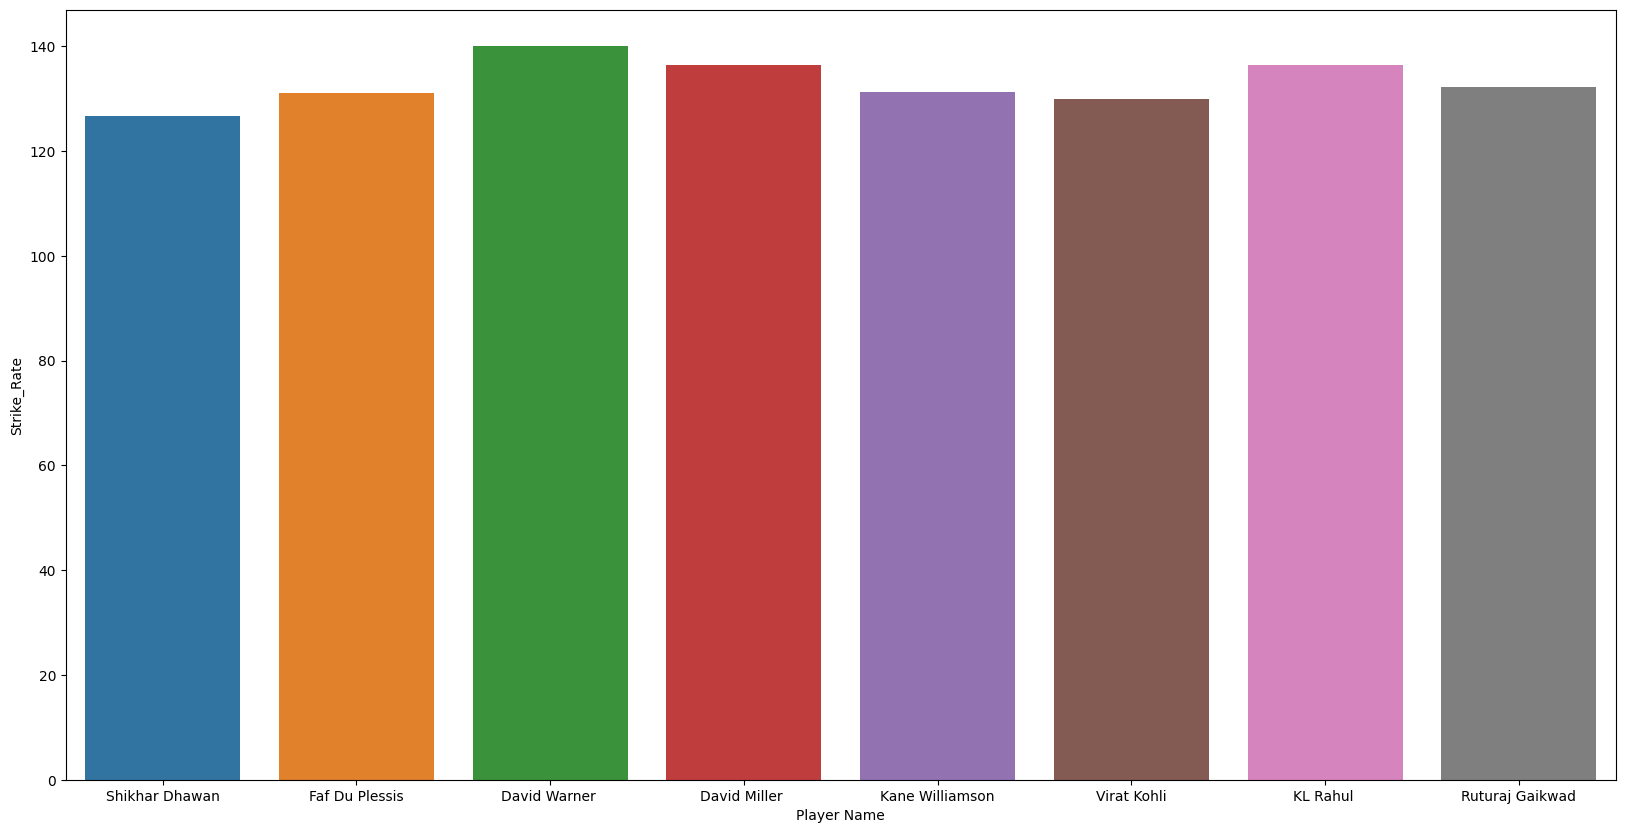

In [49]:
#Visualisizing Batters Data
#Below Bar Graph will represent Strike_Rate of Top Batters
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name', y='Strike_Rate', data = top_batters)

<Axes: xlabel='Player Name', ylabel='Runs'>

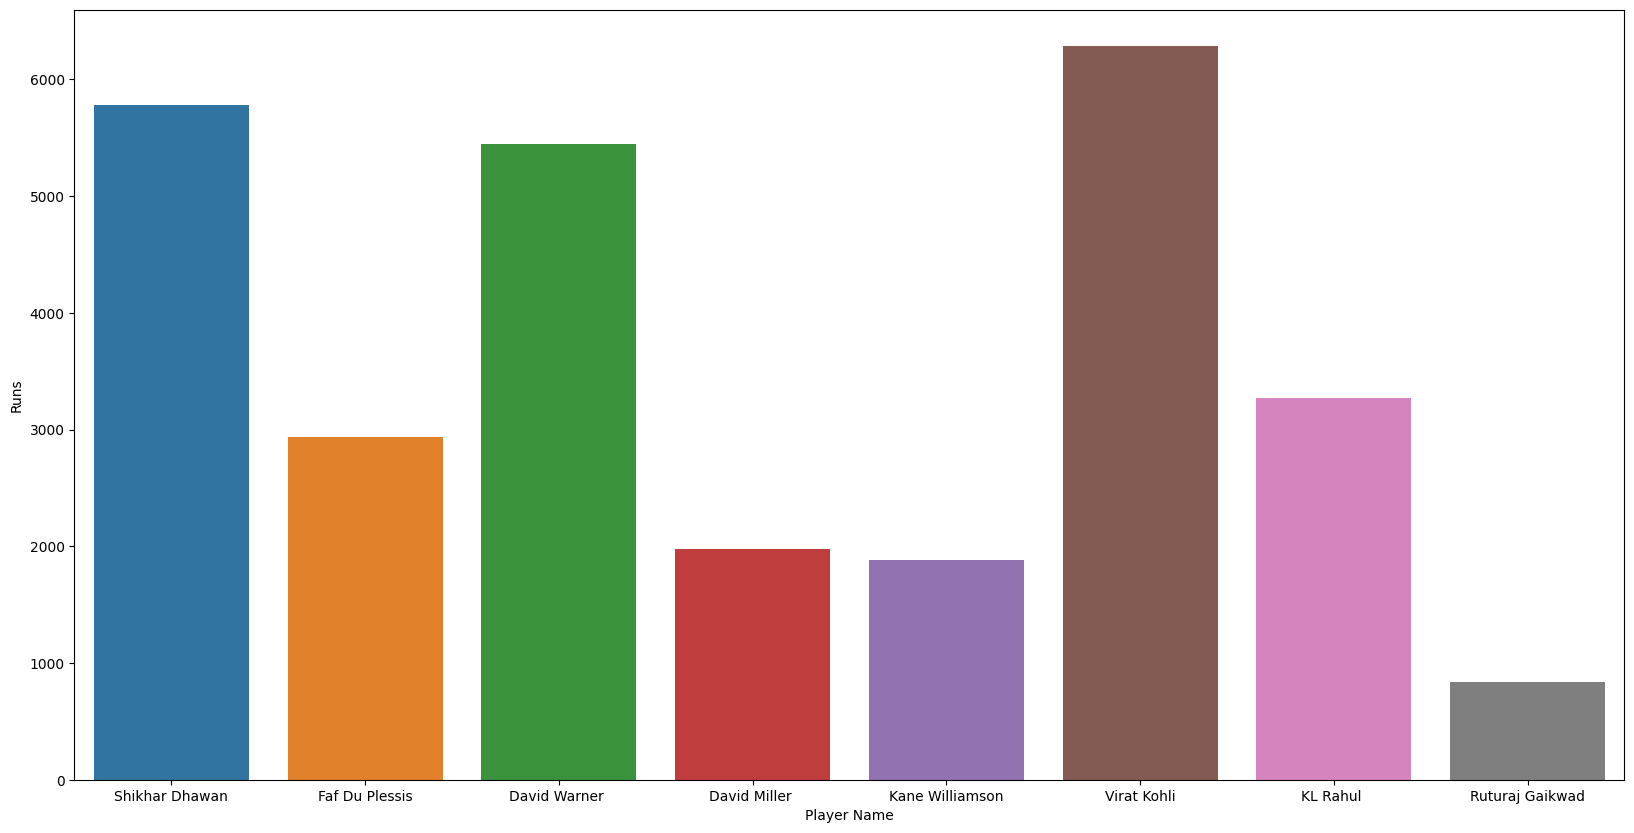

In [50]:
#Below Bar Graph will represent Runs of Top Batters
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name', y='Runs', data = top_batters)

<Axes: xlabel='Player Name', ylabel='Average'>

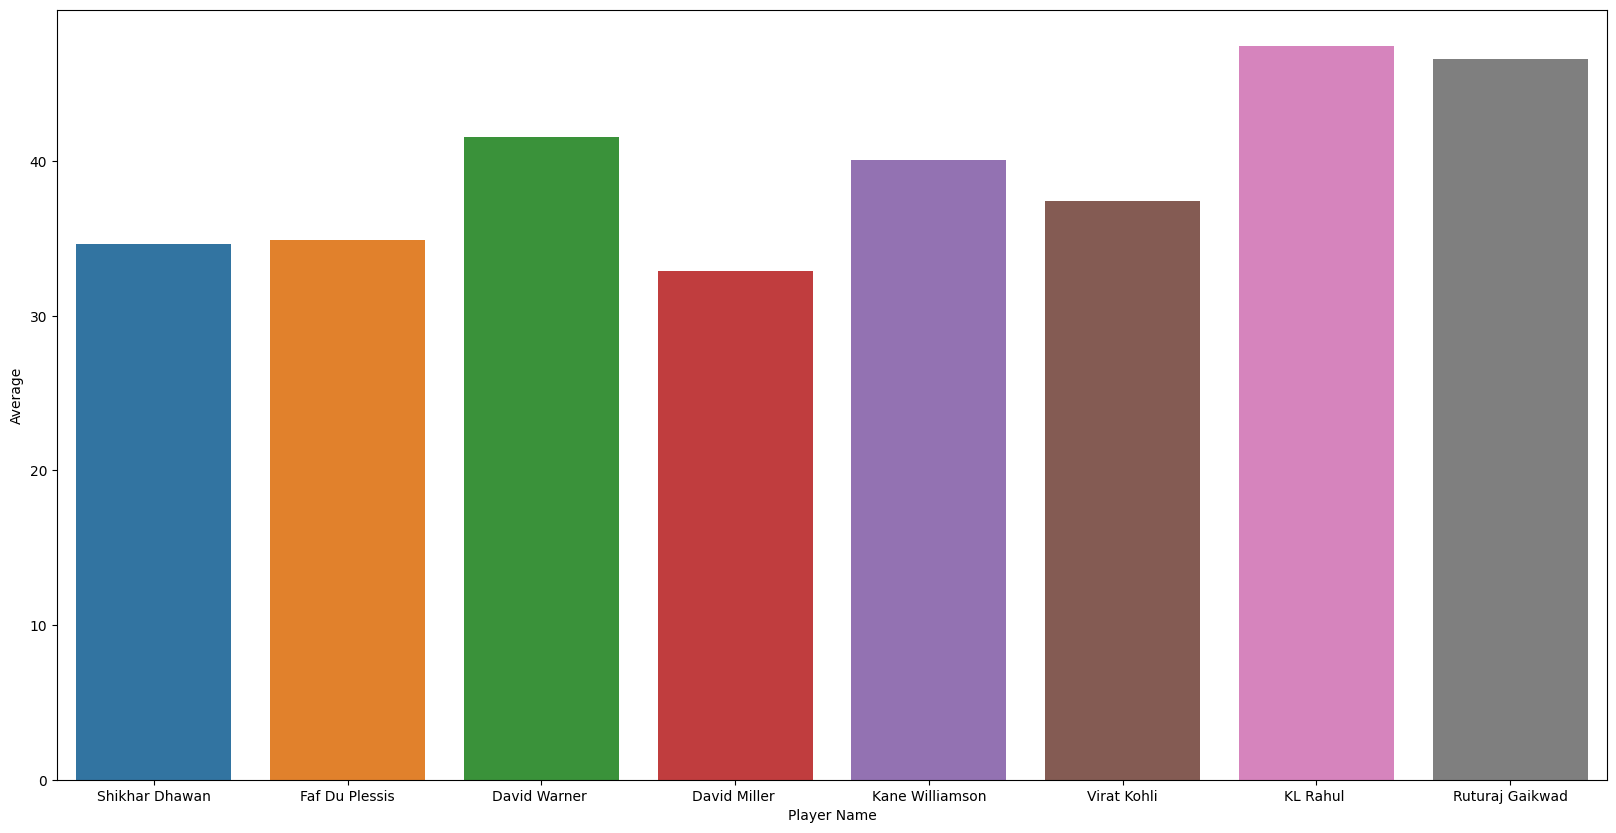

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

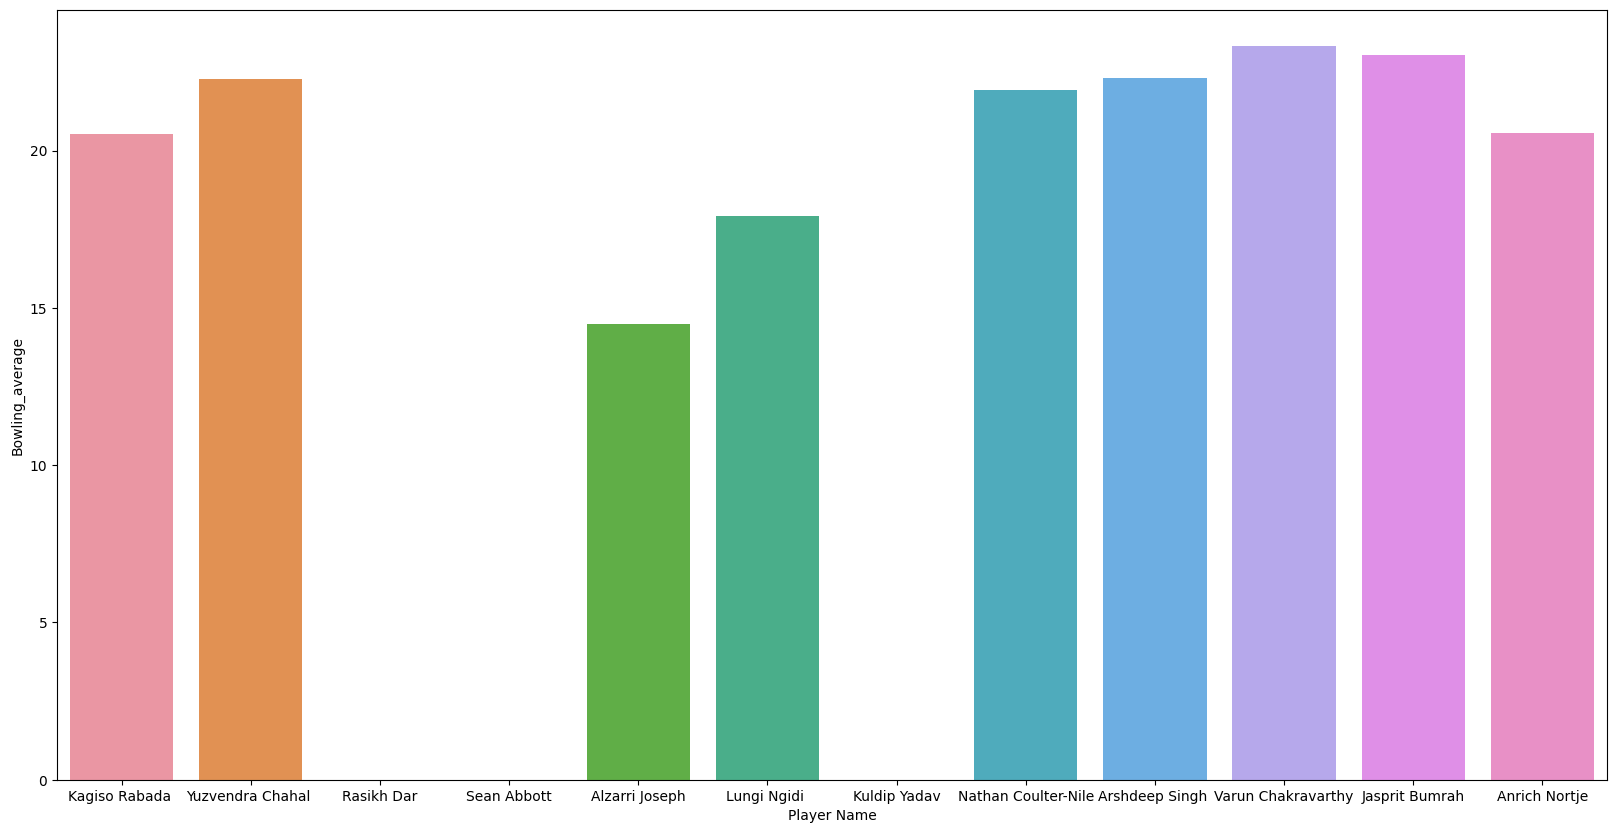

In [52]:
# Visualising Bowlers Data
#Below Bar Graph will represent Bowling_Average of Top Bowlers
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name', y='Bowling_average', data = top_bowlers)

<Axes: xlabel='Player Name', ylabel='Economy'>

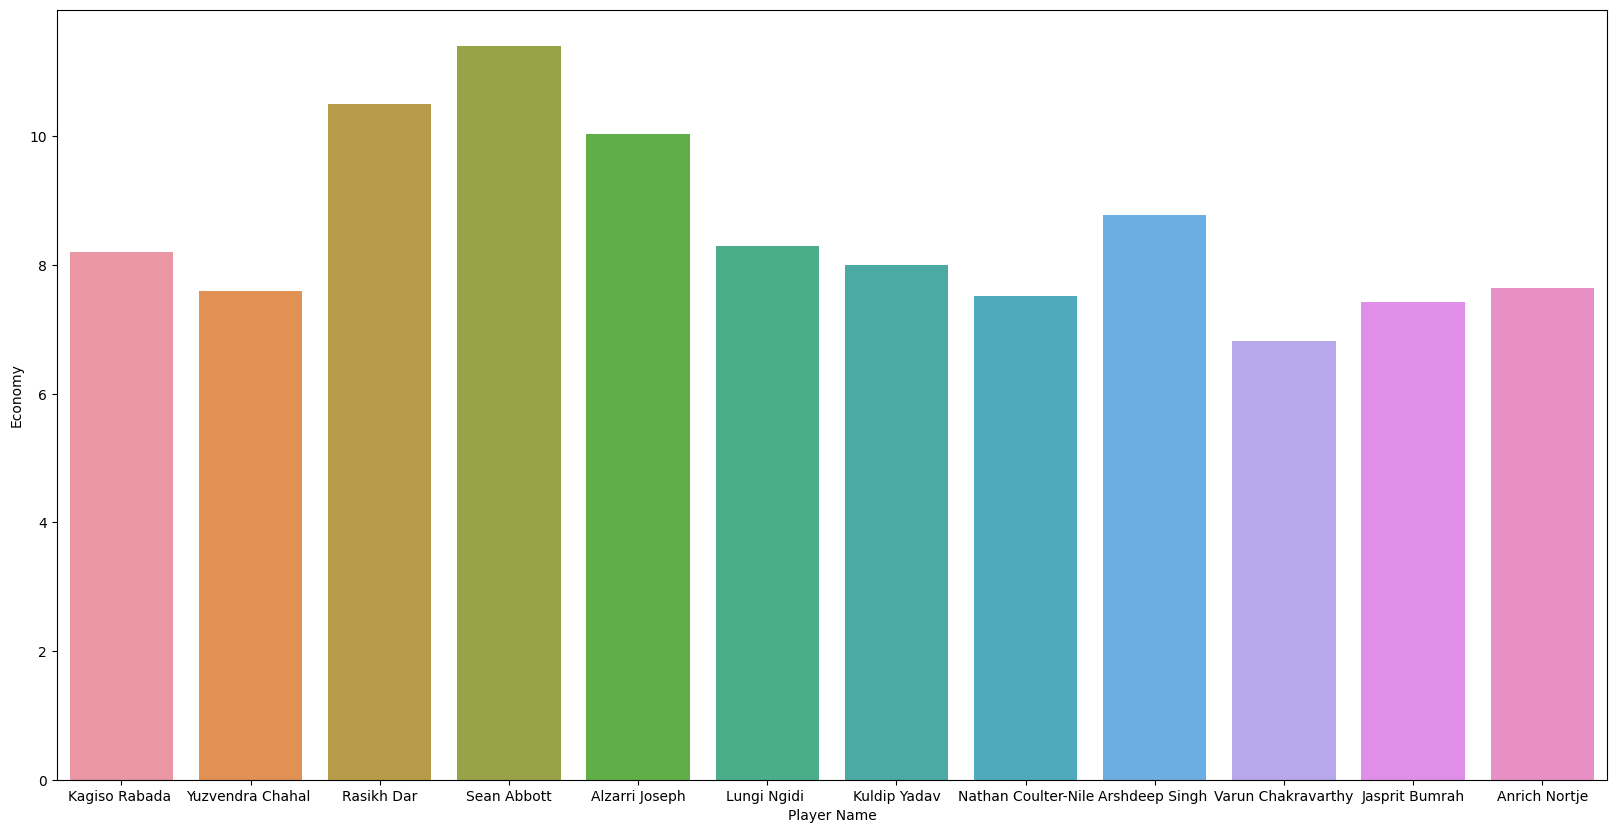

In [53]:
#Below Bar Graph will represent the Economy of Top Bowlers
plt.figure(figsize=(20,10))
sns.barplot(x ='Player Name',y ='Economy',data = top_bowlers)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

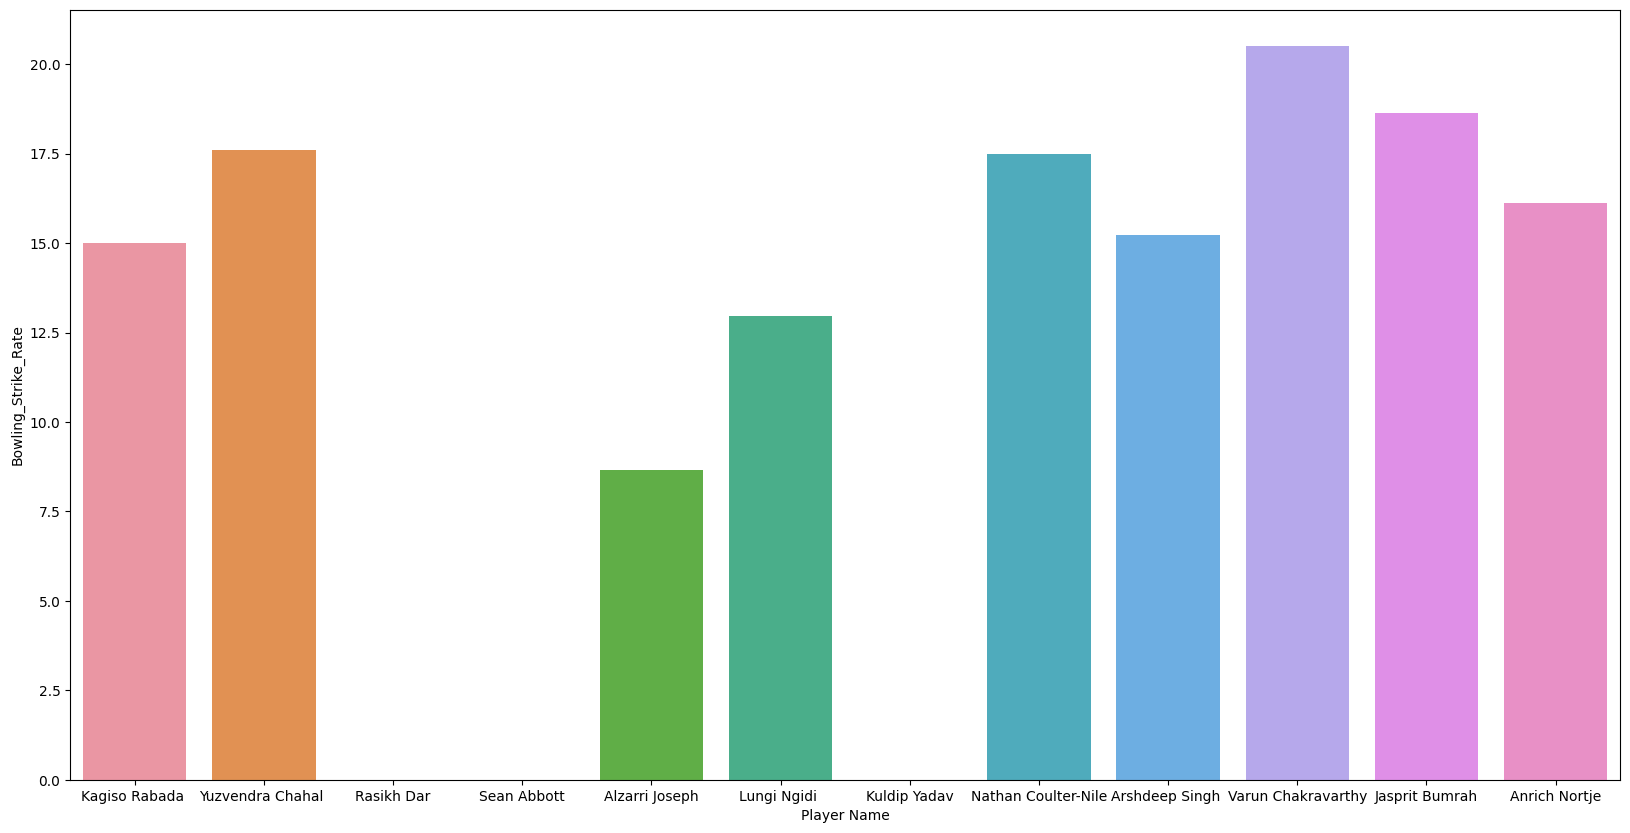

In [54]:
#Below Bar Graph will represent the Bowling Strike_Rate of Top Bowlers
plt.figure(figsize=(20,10))
sns.barplot(x ='Player Name',y ='Bowling_Strike_Rate',data = top_bowlers) 

<Axes: xlabel='Player Name', ylabel='Wickets'>

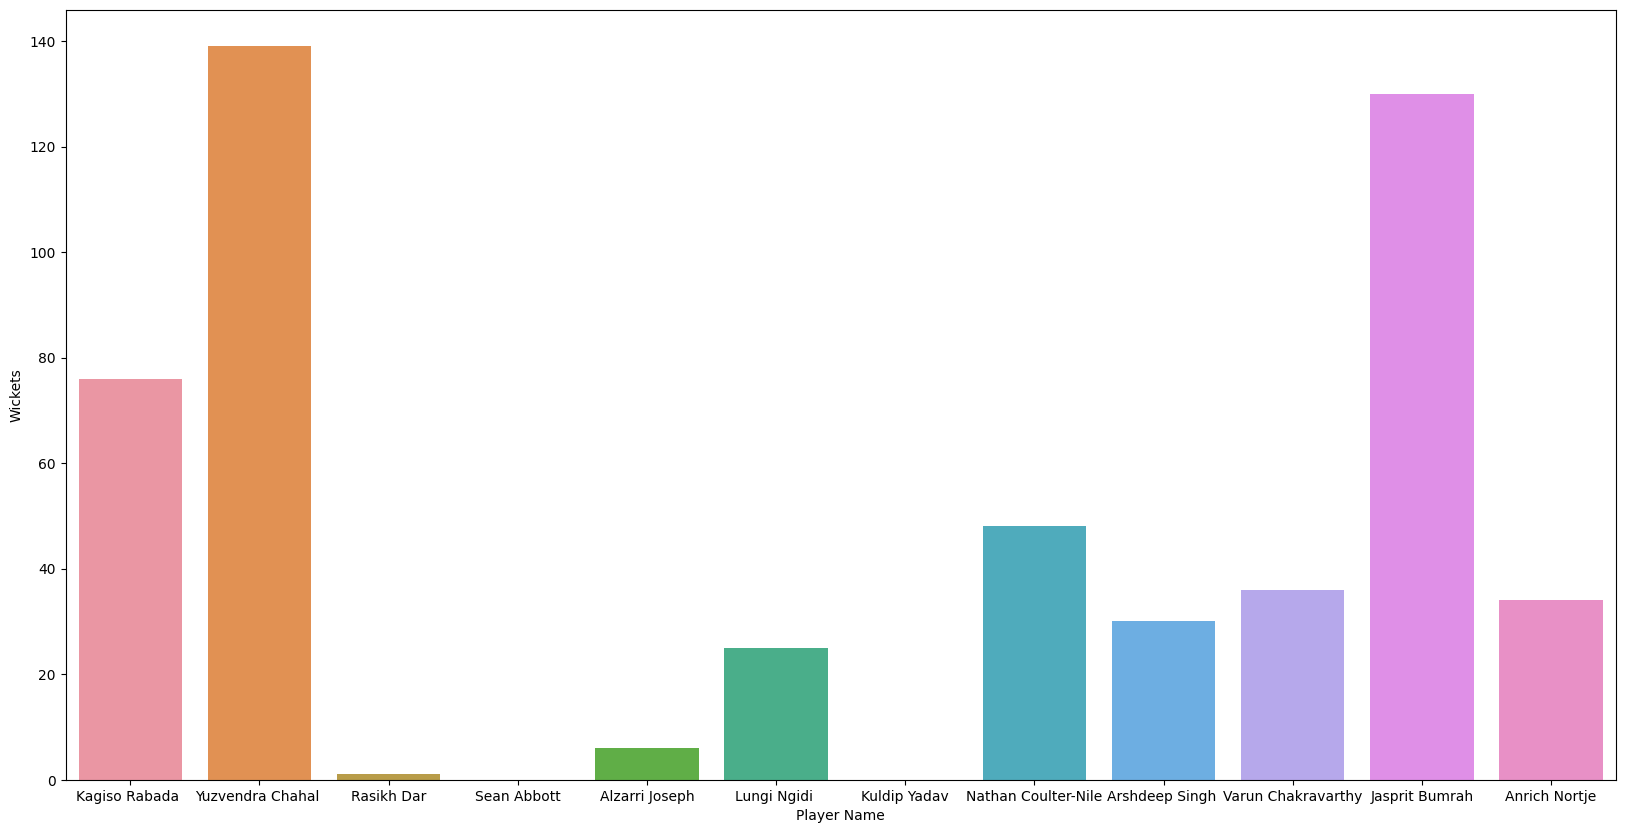

In [55]:
#Below Bar Graph shows the Wicket by Top Bowlers
plt.figure(figsize=(20,10))
sns.barplot(x ='Player Name',y ='Wickets',data = top_bowlers)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

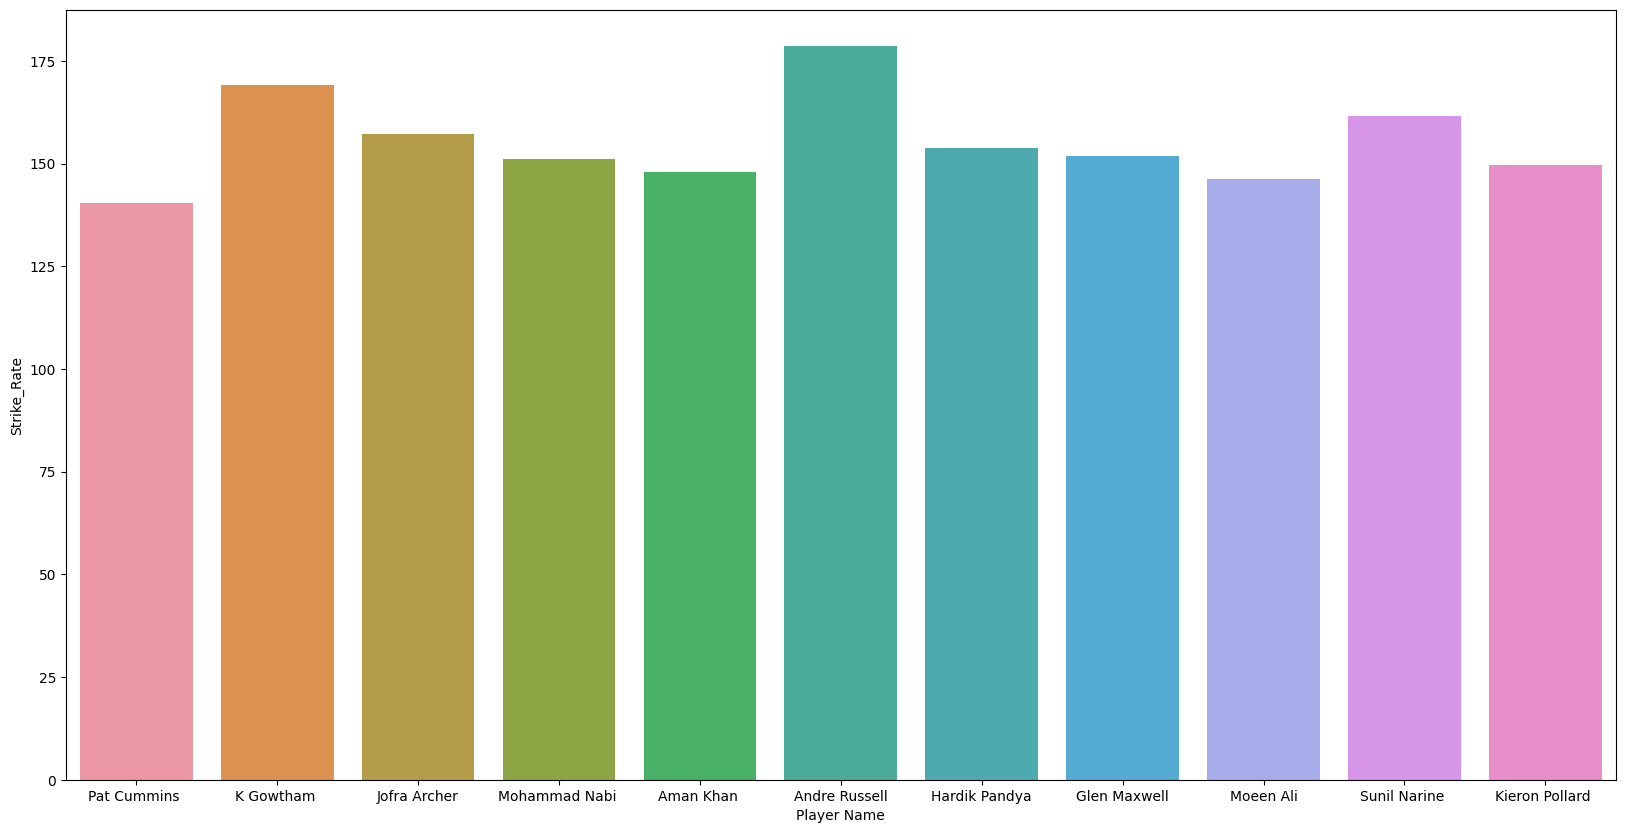

In [59]:
# Visualizing All-Rounders Data
# Bar Graph below represents the strike_rate of top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Strike_Rate', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Average'>

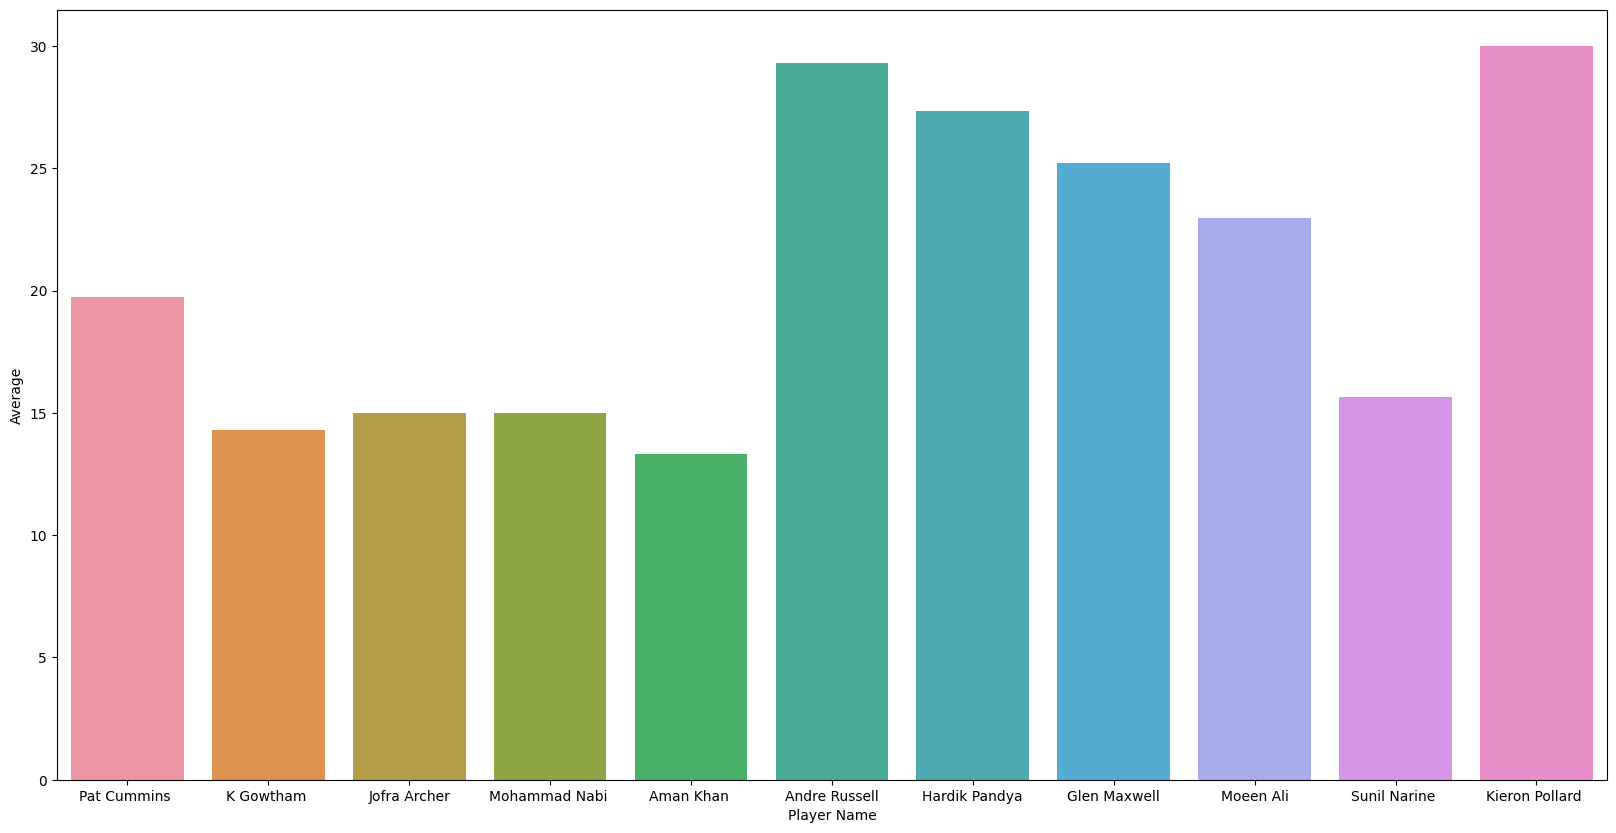

In [60]:
# Bar Graph below represents the Average of top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Average', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Matches_Played'>

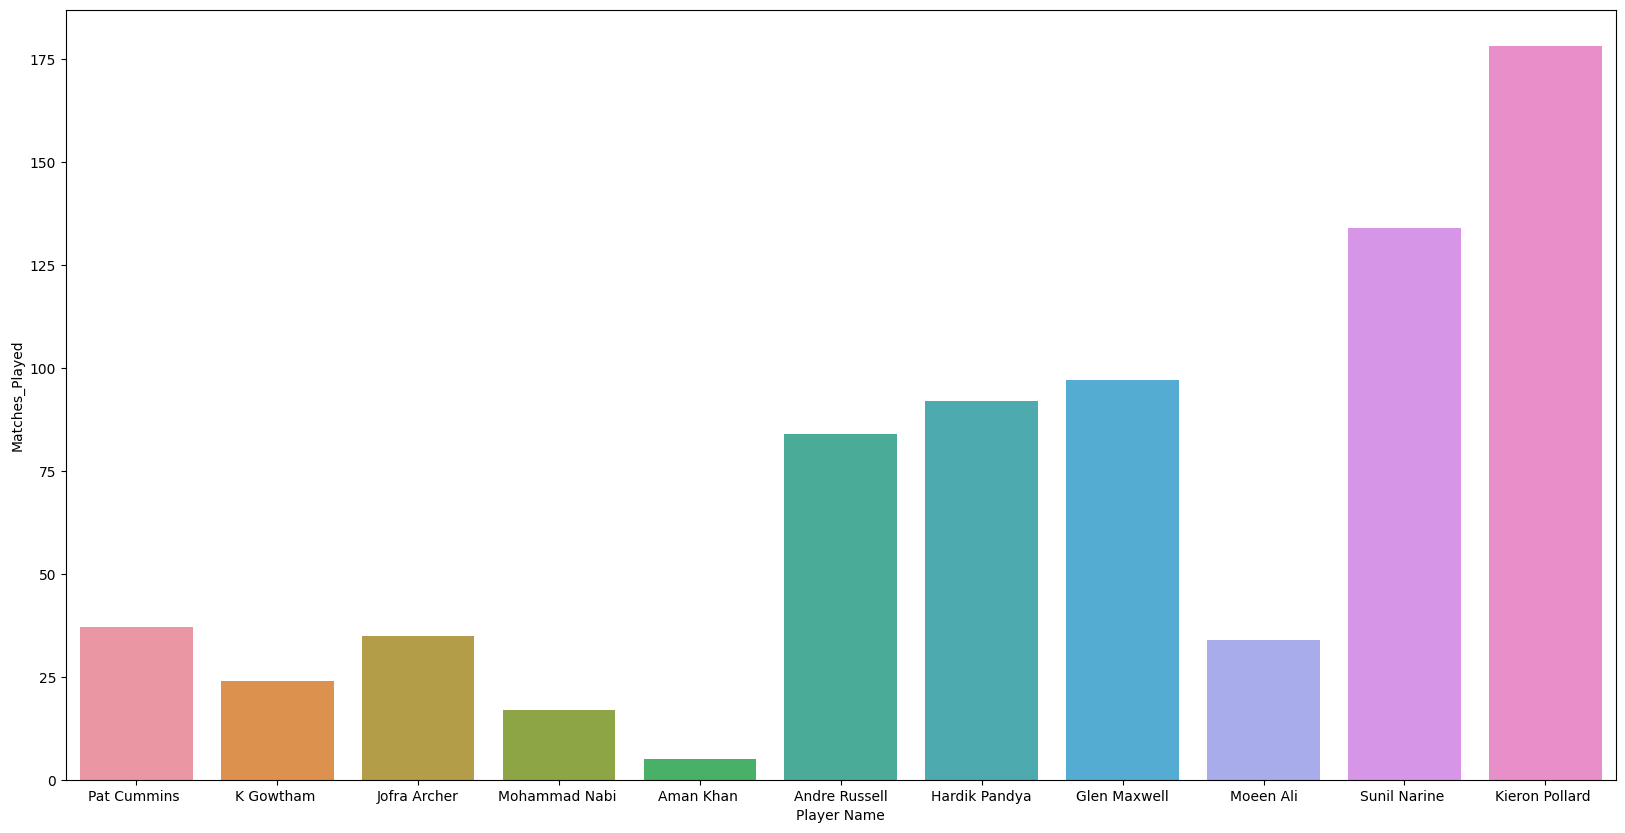

In [61]:
# Bar Graph below represents the matches played by top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Matches_Played', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Runs'>

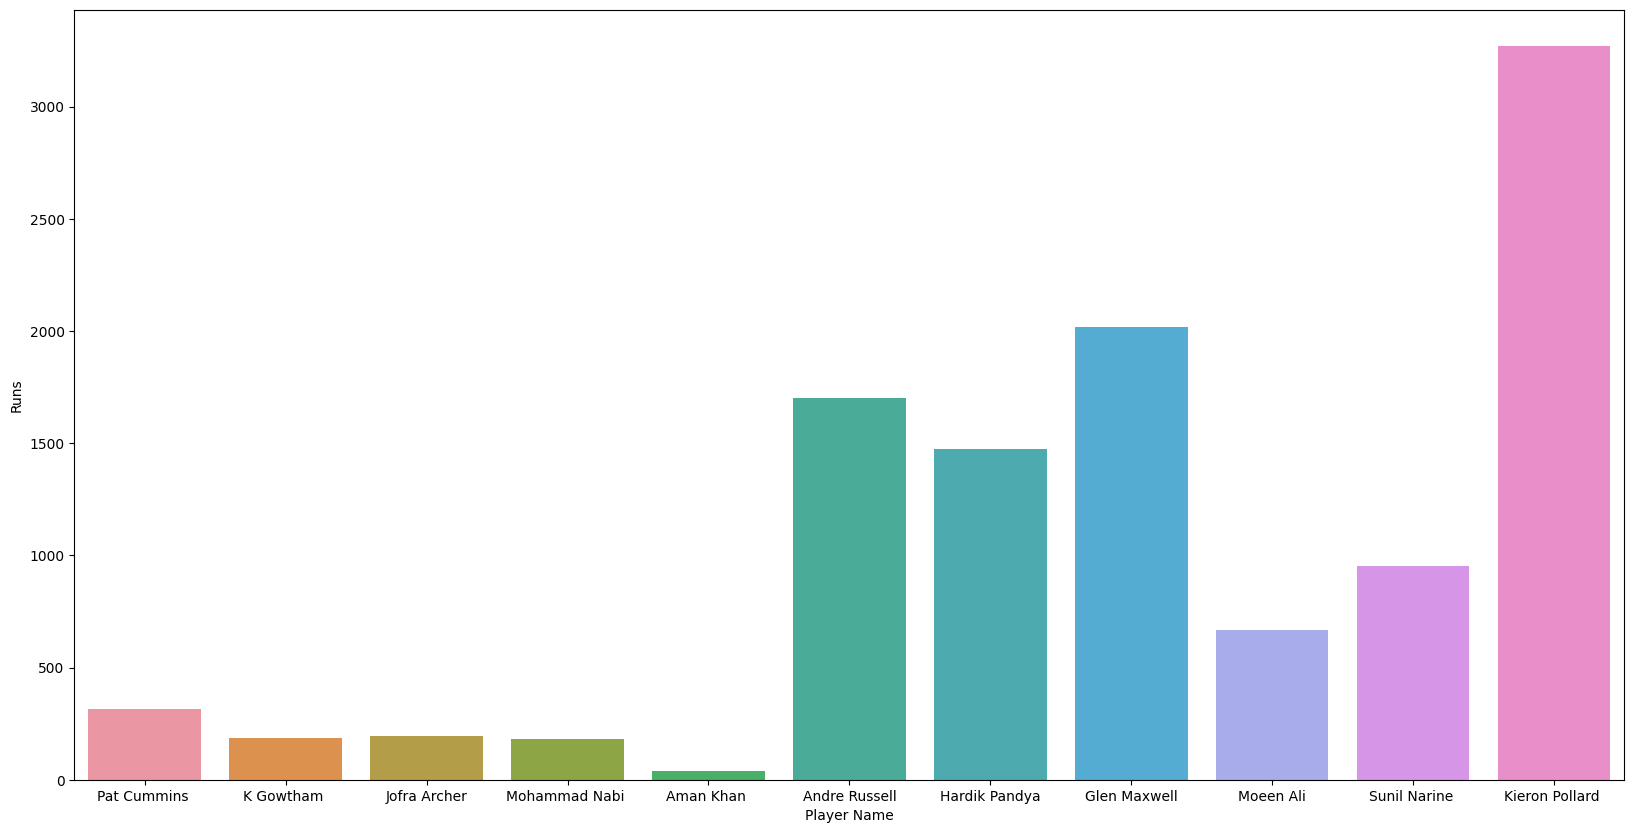

In [62]:
# Bar Graph below represents the runs scored by top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Runs', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

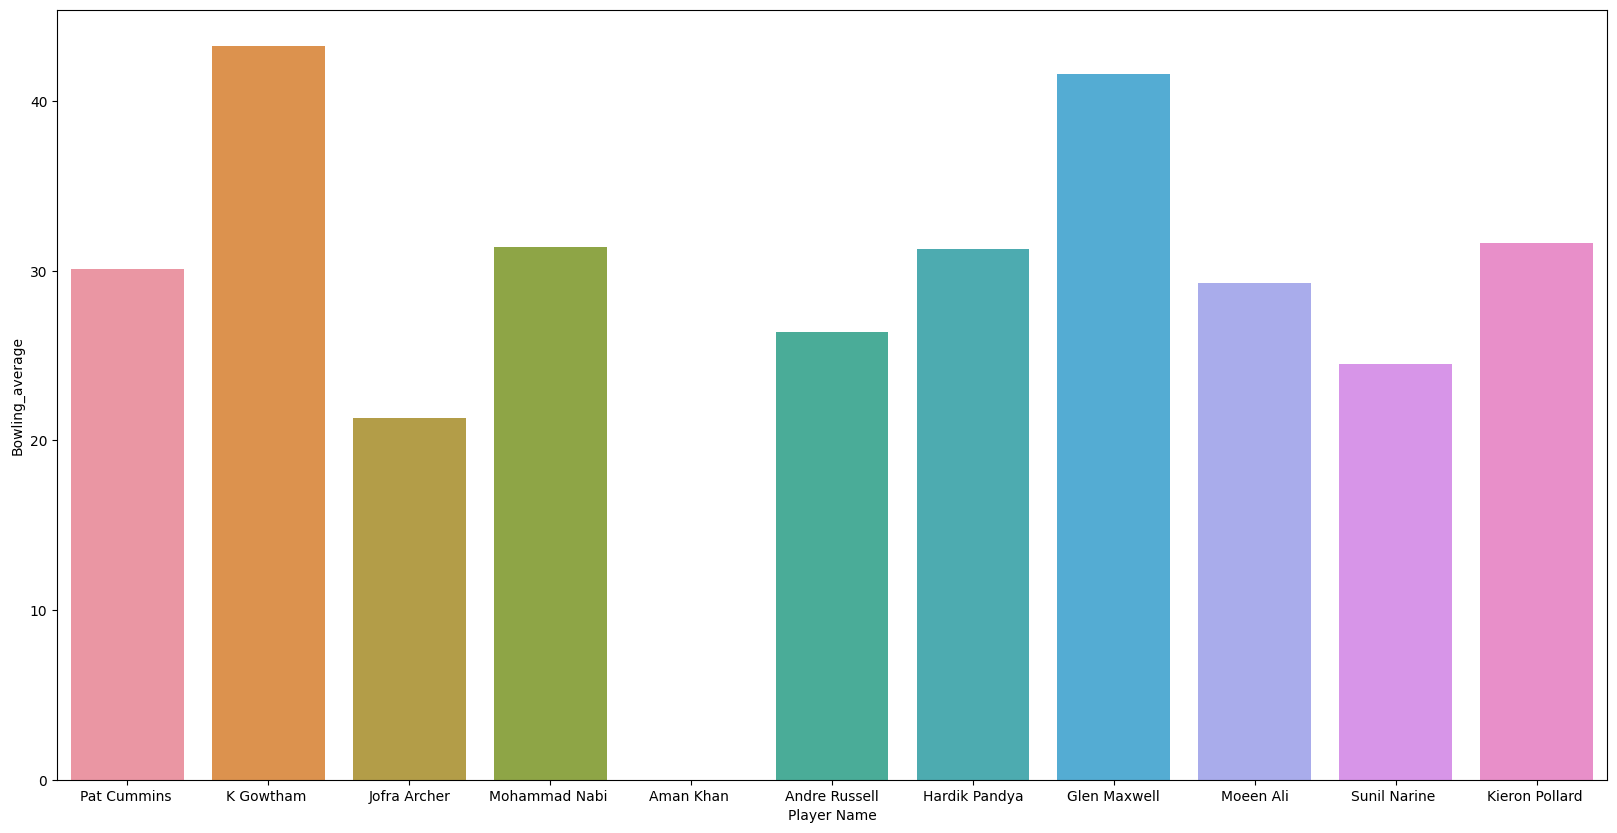

In [64]:
# Bar Graph below represents the bowling average of top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Bowling_average', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Economy'>

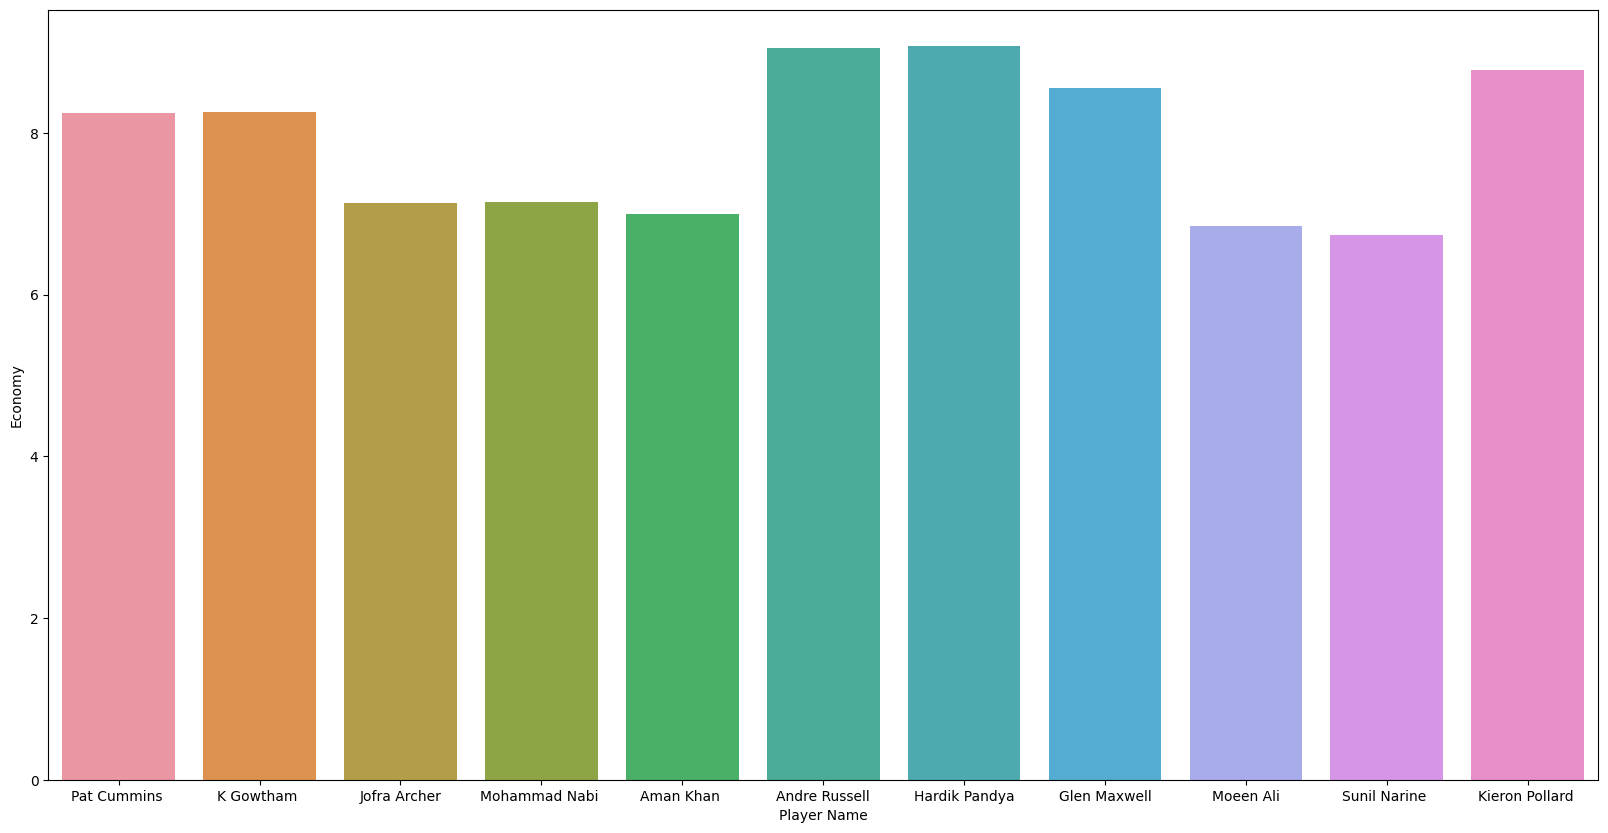

In [65]:
# Bar Graph below represents the Economy of top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Economy', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

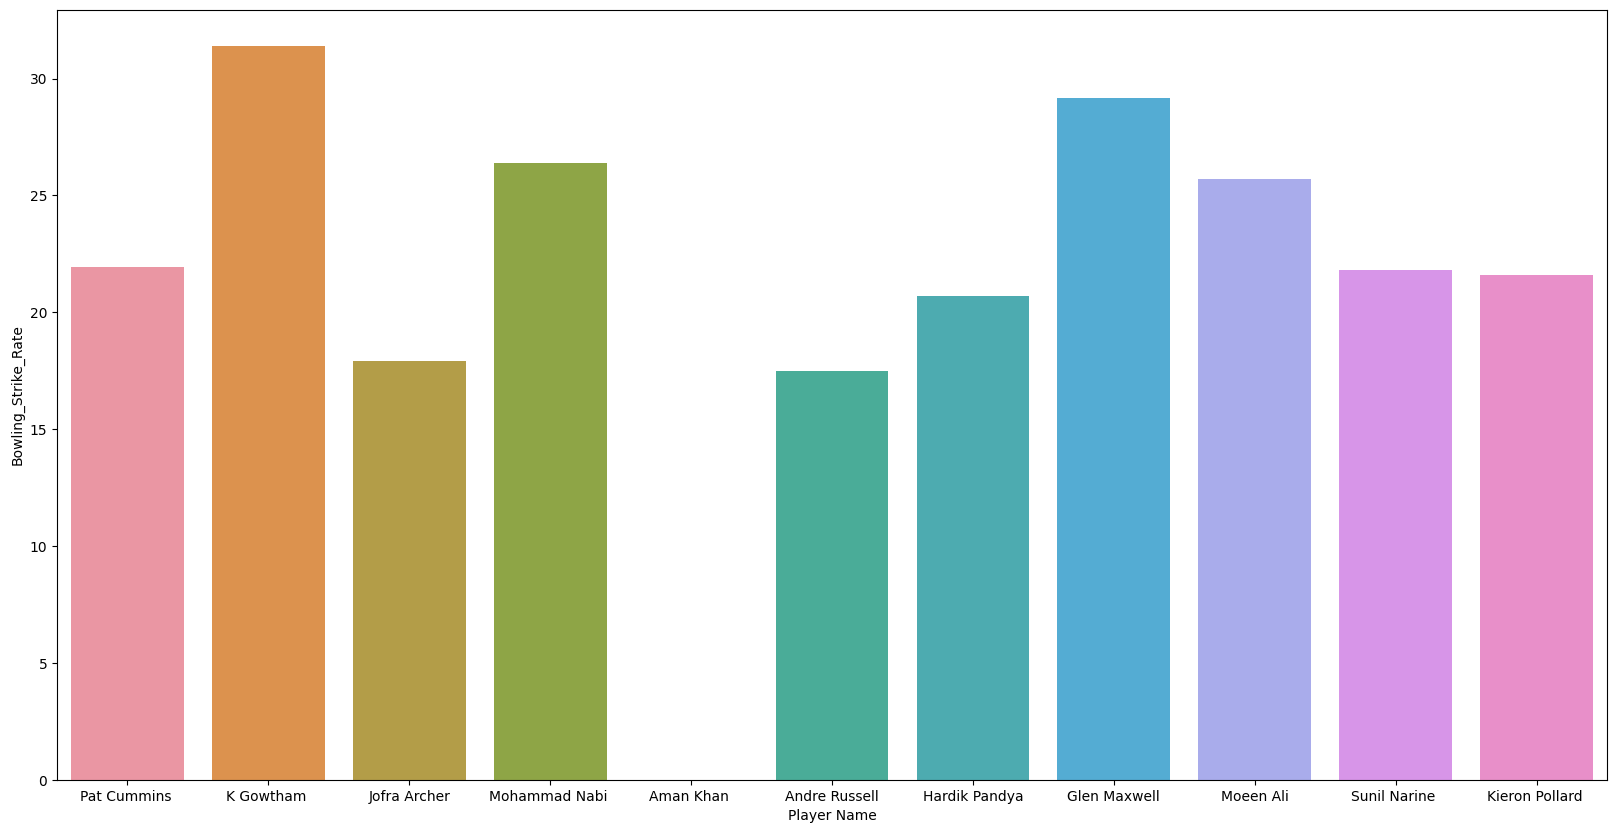

In [66]:
# Bar Graph below represents the Bowling Strike_rate of top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Bowling_Strike_Rate', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Wickets'>

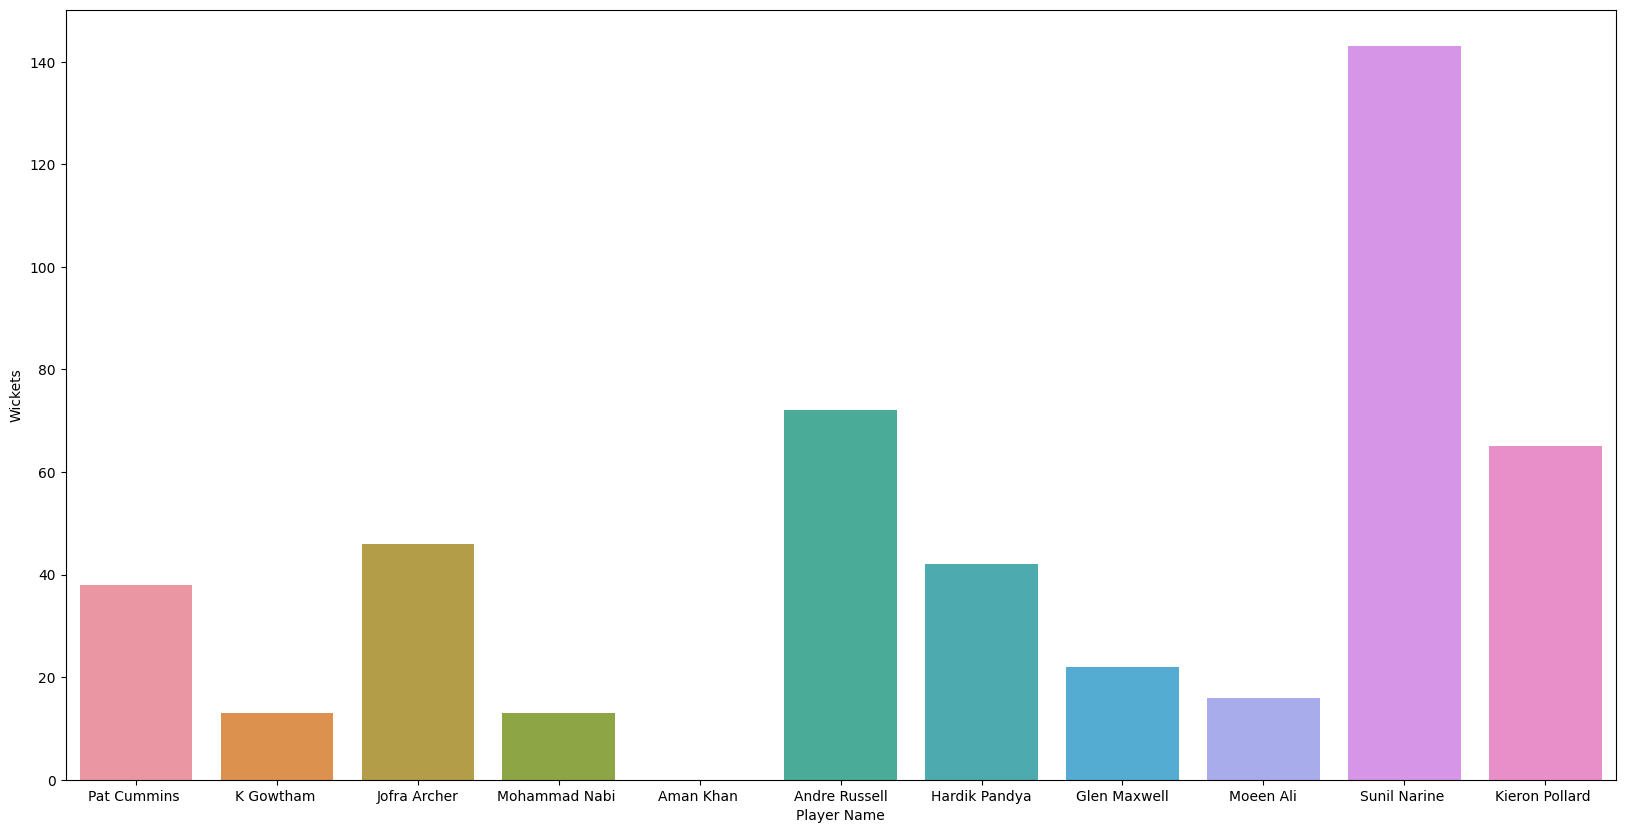

In [67]:
# Bar Graph below represents the Wickets taken by top Allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x = 'Player Name',y='Wickets', data = top_allrounders)

<Axes: xlabel='Player Name', ylabel='Average'>

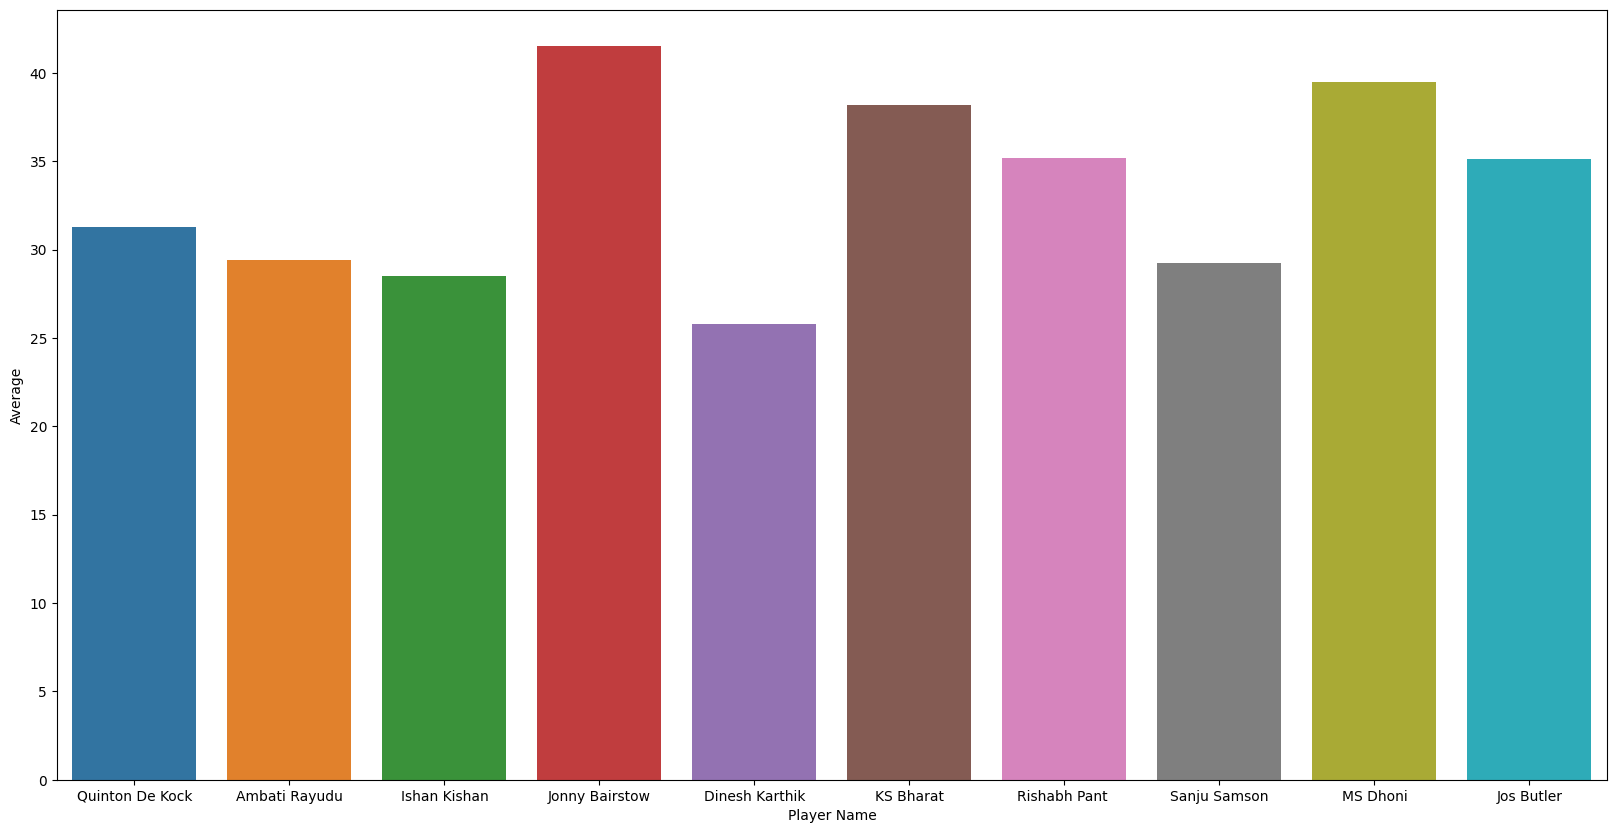

In [69]:
#Visualizing Keepers Data
# Below Bar Graph will represent the average of top Keepers
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data= top_keepers)

<Axes: xlabel='Player Name', ylabel='Runs'>

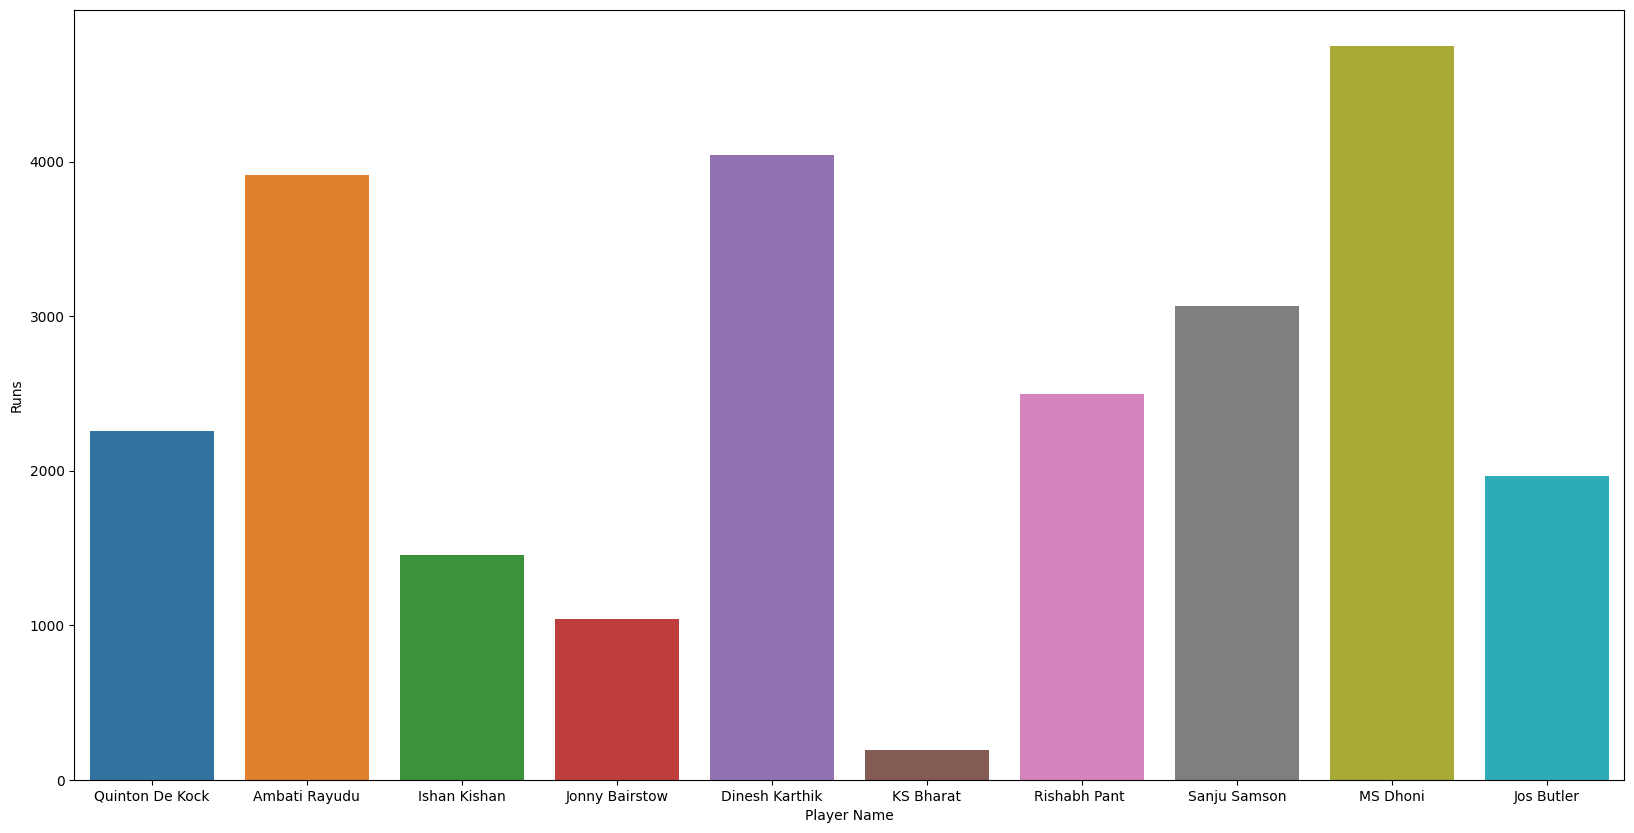

In [71]:
# Below Bar Graph will represent the no. of runs made by top Keepers
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data= top_keepers)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

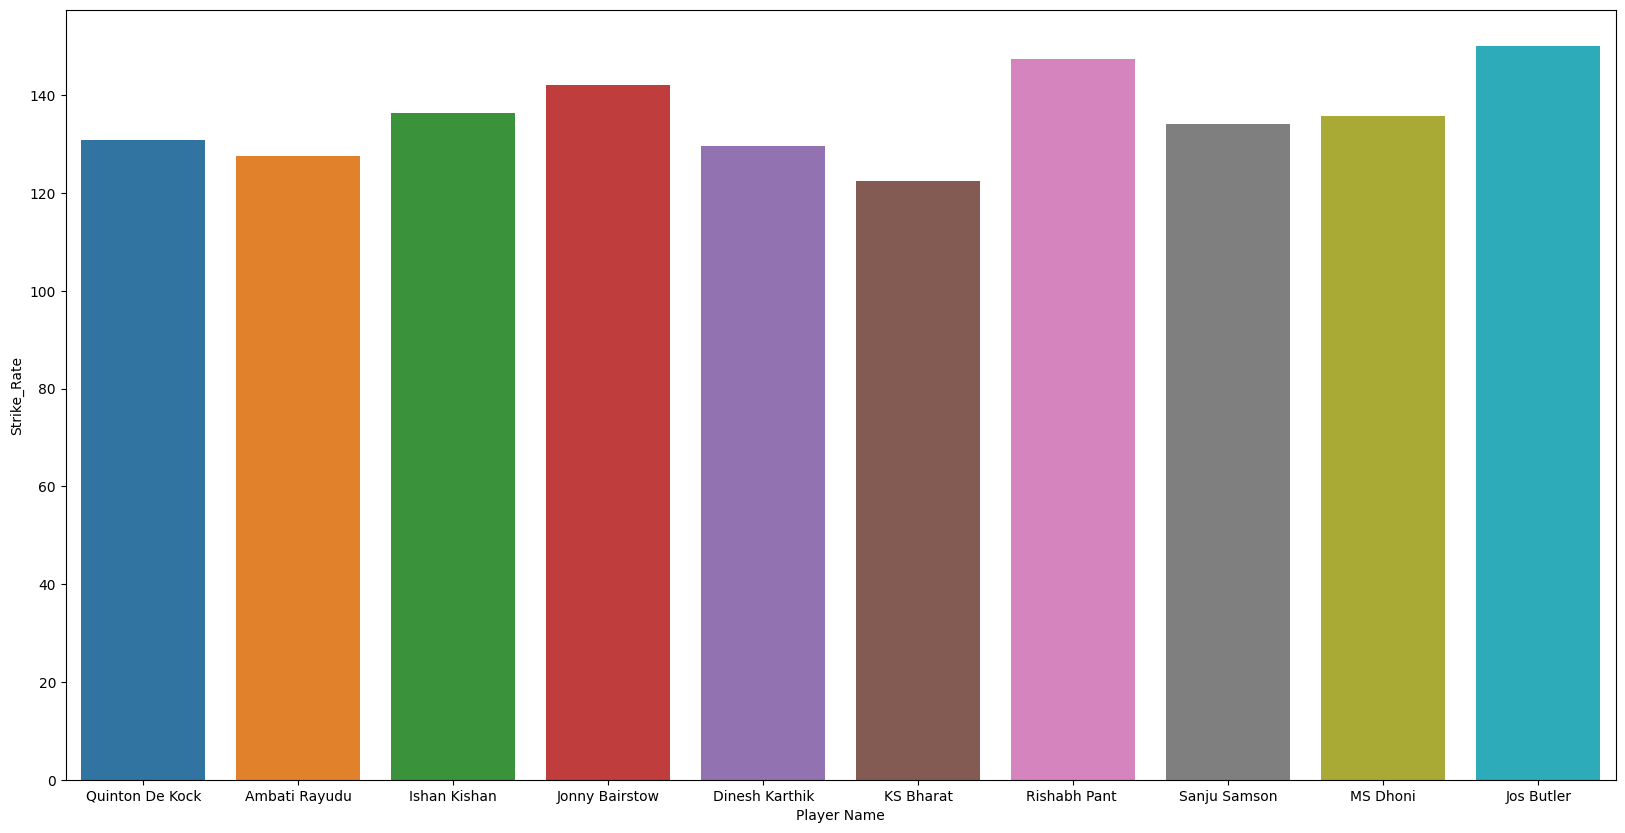

In [72]:
# Below Bar Graph will represent the Strike_Rate of top Keepers
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data= top_keepers)

<Axes: xlabel='Player Name', ylabel='Catches'>

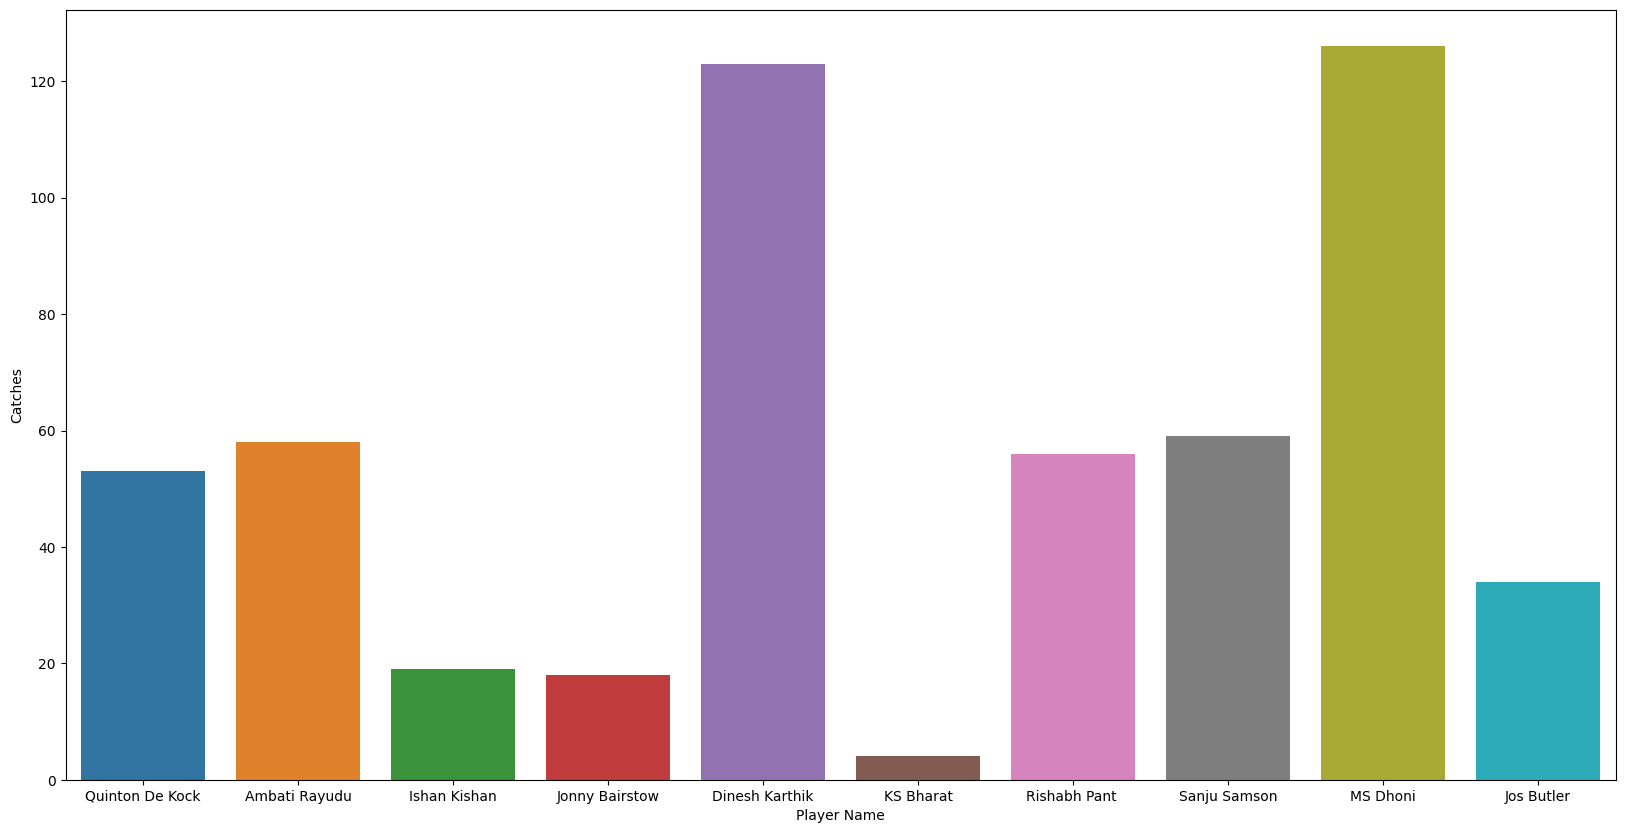

In [74]:
# Below Bar Graph will represent the no. of catches made by top Keepers
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Catches', data= top_keepers)

<Axes: xlabel='Player Name', ylabel='Run_outs'>

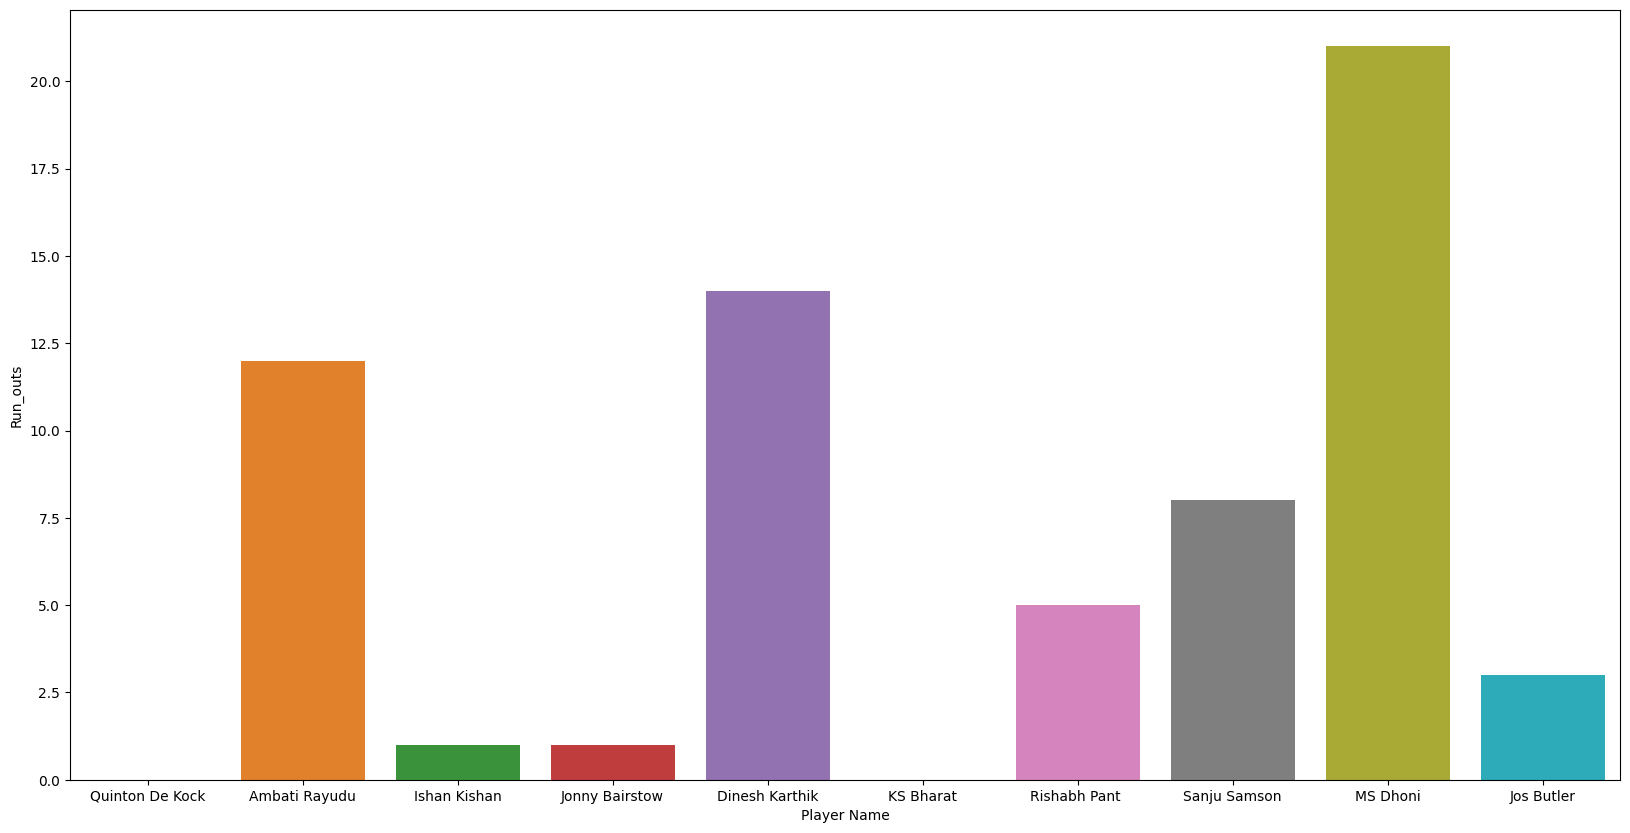

In [75]:
# Below Bar Graph will represent the no. of run-outs by top Keepers
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Run_outs', data= top_keepers)

<Axes: title={'center': 'Average'}>

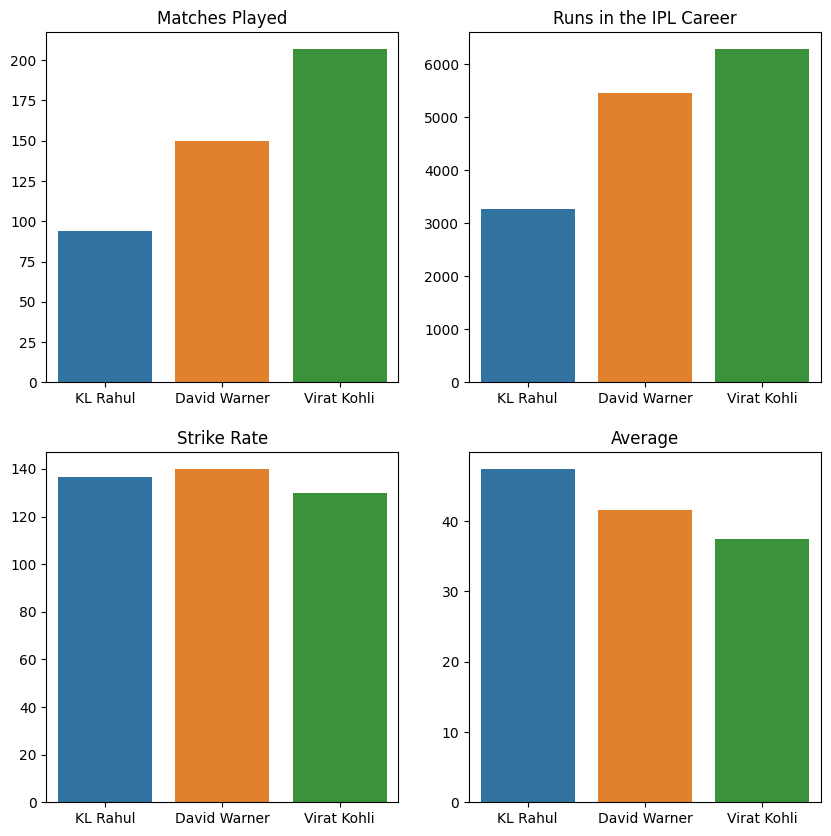

In [78]:
#Batters for the final 11: KL Rahul, Virat Kohli, David Warner
# Below, We are storing the values of each player in a separate dataframe used for displaying using barplot.
top_batters.reset_index(drop=True)
matches_values= [top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
runs_values=[top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
average_values=[top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
Strike_rate_values =[top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
Labels=['KL Rahul','David Warner','Virat Kohli']

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=Strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])

<Axes: title={'center': 'Economy'}>

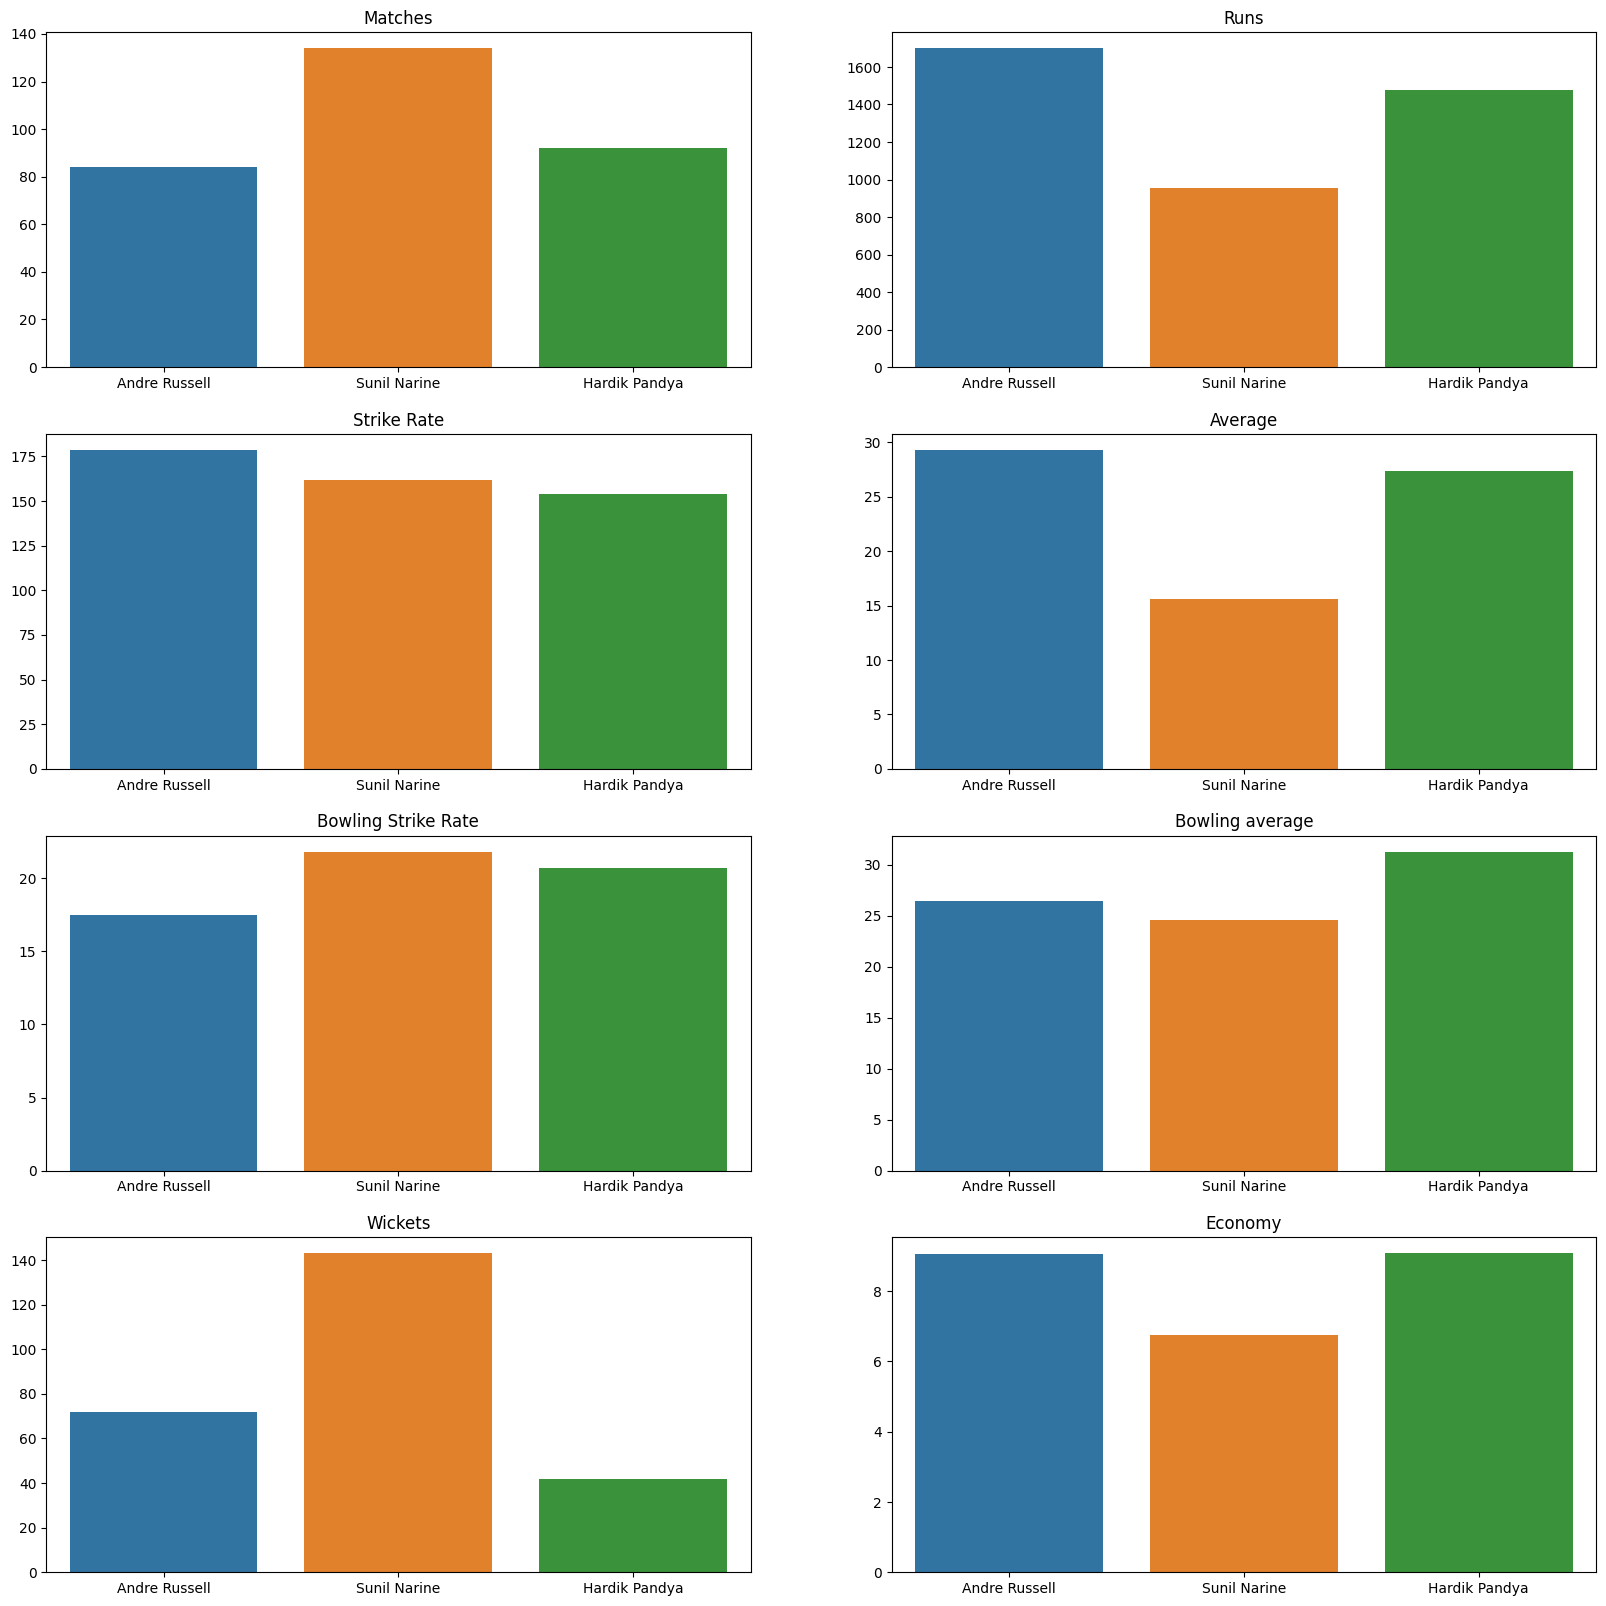

In [82]:
# All Rounders included in final 11 are as follows: Andre Russell, Sunil Narine, Hardik Pandya
top_allrounders.reset_index(drop=True)
matches_values= [top_allrounders.iloc[5]['Matches_Played'],top_allrounders.iloc[9]['Matches_Played'],top_allrounders.iloc[6]['Matches_Played']]
runs_values=[top_allrounders.iloc[5]['Runs'],top_allrounders.iloc[9]['Runs'],top_allrounders.iloc[6]['Runs']]
average_values=[top_allrounders.iloc[5]['Average'],top_allrounders.iloc[9]['Average'],top_allrounders.iloc[6]['Average']]
strike_rate_values =[top_allrounders.iloc[5]['Strike_Rate'],top_allrounders.iloc[9]['Strike_Rate'],top_allrounders.iloc[6]['Strike_Rate']]
bowling_strike_rate_values = [top_allrounders.iloc[5]['Bowling_Strike_Rate'],top_allrounders.iloc[9]['Bowling_Strike_Rate'],top_allrounders.iloc[6]['Bowling_Strike_Rate']]
bowling_average_values =[top_allrounders.iloc[5]['Bowling_average'],top_allrounders.iloc[9]['Bowling_average'],top_allrounders.iloc[6]['Bowling_average']]
wickets_values =[top_allrounders.iloc[5]['Wickets'],top_allrounders.iloc[9]['Wickets'],top_allrounders.iloc[6]['Wickets']]
economy_values =[top_allrounders.iloc[5]['Economy'],top_allrounders.iloc[9]['Economy'],top_allrounders.iloc[6]['Economy']]

Labels=['Andre Russell','Sunil Narine','Hardik Pandya']

fig, axes = plt.subplots(4,2, figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=Labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=Labels, y=economy_values, ax=axes[3][1])

<Axes: title={'center': 'Economy'}>

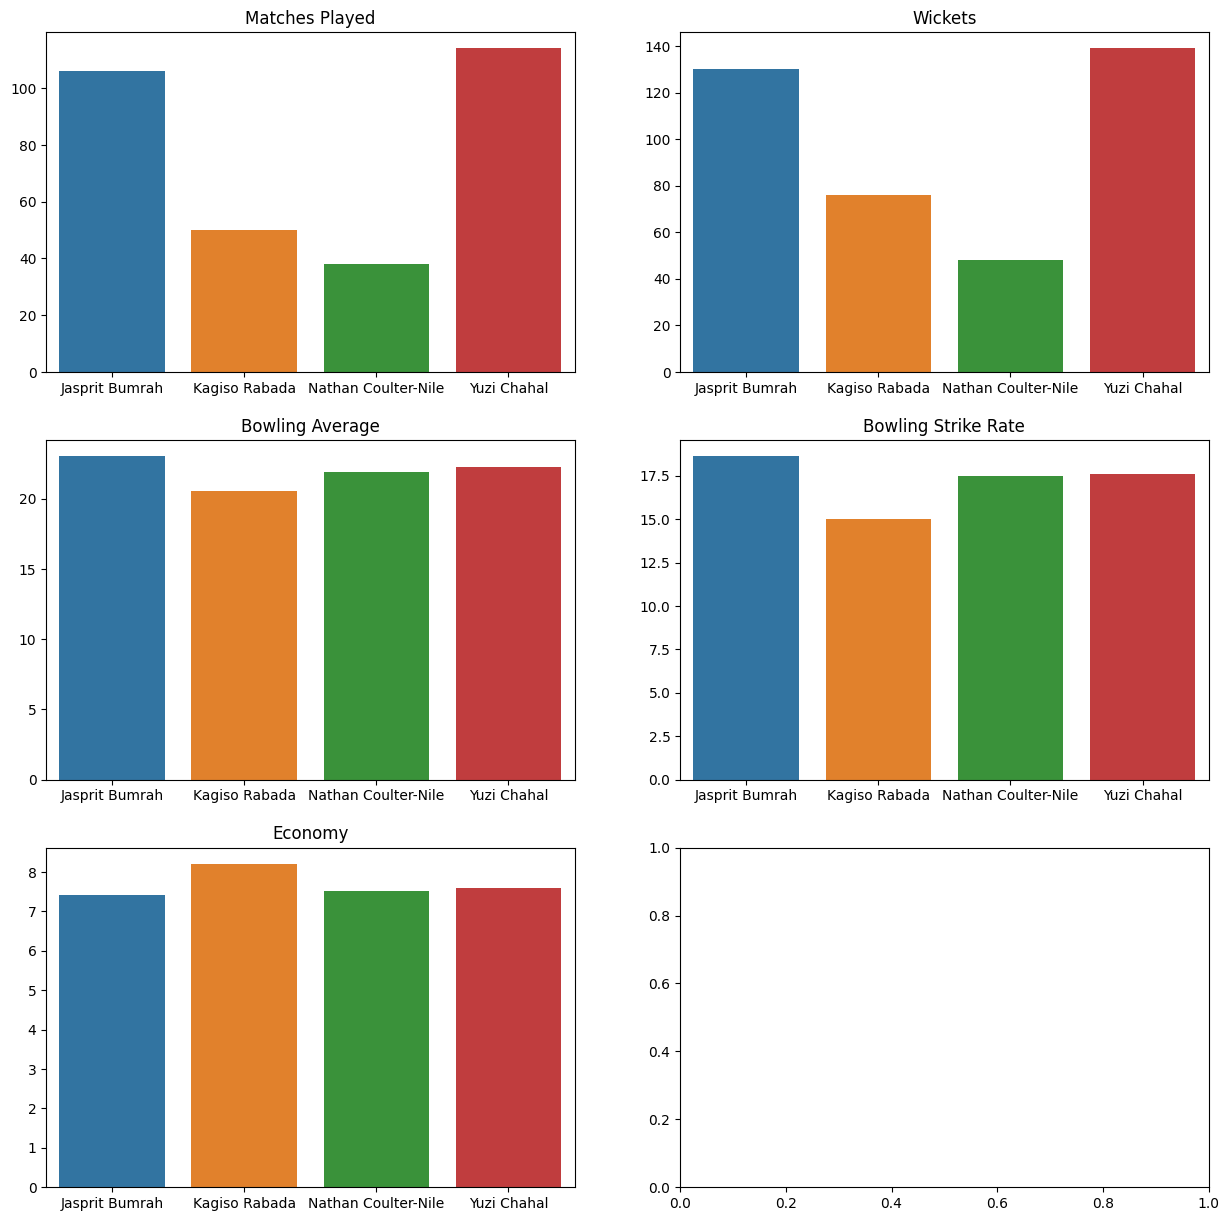

In [83]:
top_bowlers.reset_index(drop=True)
matches_values= [top_bowlers.iloc[10]['Matches_Played'],top_bowlers.iloc[0]['Matches_Played'],top_bowlers.iloc[7]['Matches_Played'],top_bowlers.iloc[1]['Matches_Played']]
wickets_values=[top_bowlers.iloc[10]['Wickets'],top_bowlers.iloc[0]['Wickets'],top_bowlers.iloc[7]['Wickets'],top_bowlers.iloc[1]['Wickets']]
bowling_average_values=[top_bowlers.iloc[10]['Bowling_average'],top_bowlers.iloc[0]['Bowling_average'],top_bowlers.iloc[7]['Bowling_average'],top_bowlers.iloc[1]['Bowling_average']]
bowling_strike_rate_values =[top_bowlers.iloc[10]['Bowling_Strike_Rate'],top_bowlers.iloc[0]['Bowling_Strike_Rate'],top_bowlers.iloc[7]['Bowling_Strike_Rate'],top_bowlers.iloc[1]['Bowling_Strike_Rate']]
economy_values=[top_bowlers.iloc[10]['Economy'],top_bowlers.iloc[0]['Economy'],top_bowlers.iloc[7]['Economy'],top_bowlers.iloc[1]['Economy']]

Labels=['Jasprit Bumrah','Kagiso Rabada','Nathan Coulter-Nile','Yuzi Chahal']

fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=economy_values, ax=axes[2][0])

<Axes: >

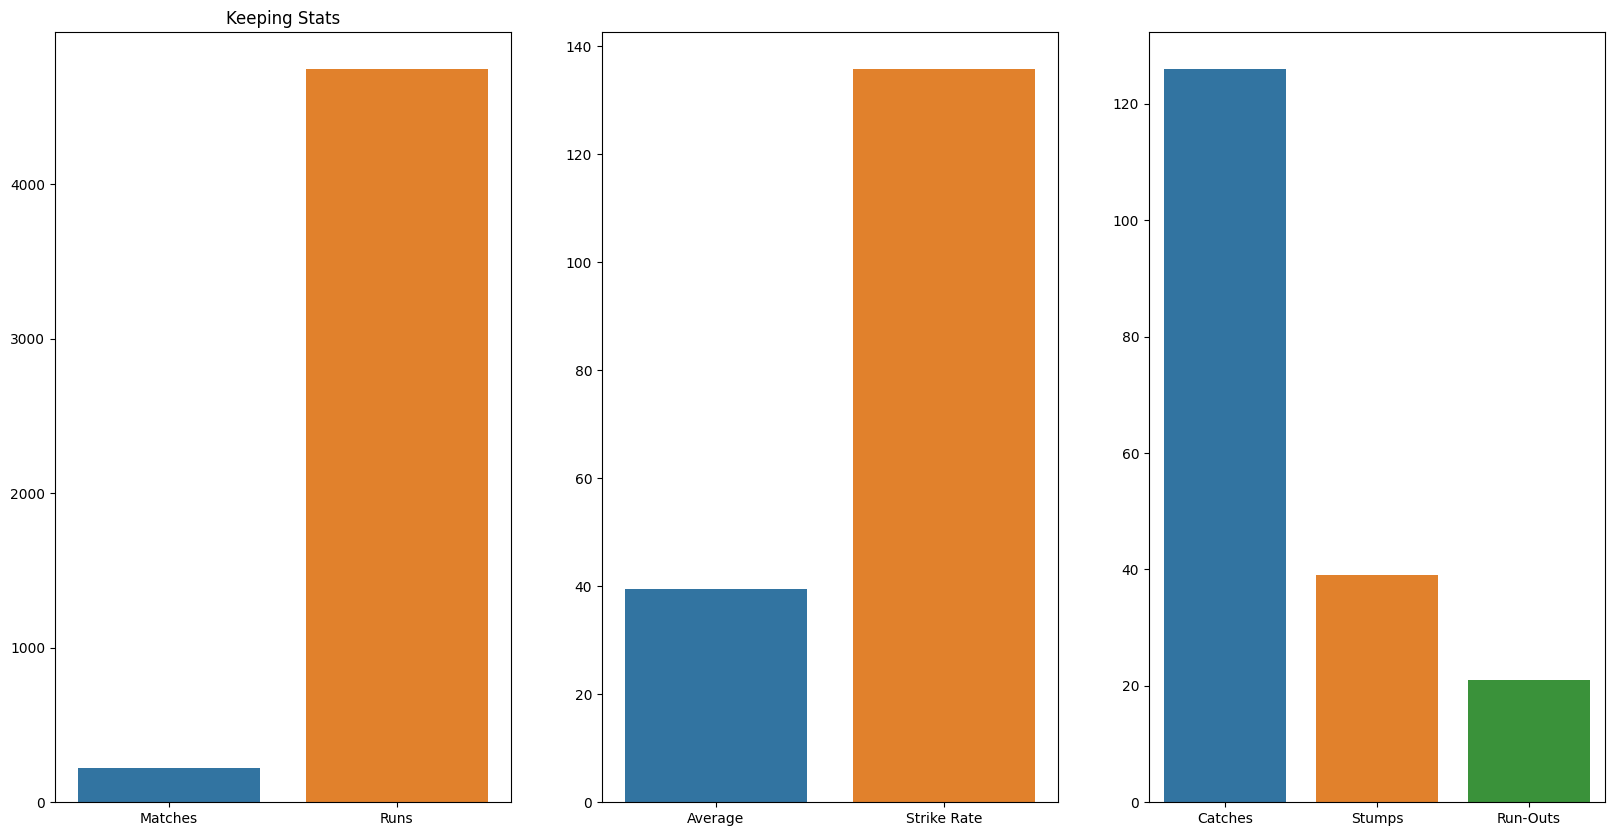

In [86]:
# Wicket Keeper for Final 11 - MS Dhoni

matches_values = [top_keepers.iloc[8]['Matches_Played'],top_keepers.iloc[8]['Runs']]
average_values = [top_keepers.iloc[8]['Average'],top_keepers.iloc[8]['Strike_Rate']]
keeping_values = [top_keepers.iloc[8]['Catches'],top_keepers.iloc[8]['Stumps'],top_keepers.iloc[8]['Run_outs']]

label1 = ['Matches','Runs']
label2 = ['Average','Strike Rate']
label3 = ['Catches','Stumps','Run-Outs']

fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].set_title("Matches and Runs")
axes[0].set_title("Average and Strike Rate")
axes[0].set_title("Keeping Stats")

sns.barplot(x=label1, y=matches_values,ax=axes[0])
sns.barplot(x=label2, y=average_values,ax=axes[1])
sns.barplot(x=label3, y=keeping_values,ax=axes[2])


<h2>Here we have our Best Playing 11</h2>

In [96]:
batter1 = top_batters.loc[(top_batters["Player Name"] == 'KL Rahul ')]
batter2 = top_batters.loc[(top_batters["Player Name"] == 'David Warner ')]
batter3 = top_batters.loc[(top_batters["Player Name"] == 'Virat Kohli')]

bowler1 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Yuzvendra Chahal ')]
bowler2 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Jasprit Bumrah')]
bowler3 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Nathan Coulter-Nile')]
bowler4 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Kagiso Rabada ')]

allrounder1 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Andre Russell')]
allrounder2 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Sunil Narine ')]
allrounder3 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Hardik Pandya')]

keeper = top_keepers.loc[(top_keepers["Player Name"] == 'MS Dhoni ')]

In [97]:
final = [batter1, batter2, batter3, allrounder1, allrounder2, allrounder3, keeper, bowler1, bowler2, bowler3, bowler4]
final_team = pd.concat(final)
final_team = final_team.drop(labels=['Matches_Played', 'Runs', 'Average', 'Strike_Rate',
                                     'Wickets','Bowling_average','Economy','Bowling_Strike_Rate',
                                     'Catches','Run_outs','Stumps'], axis=1)
final_team.reset_index(drop=True)

,Player Name,Team,Nationality
0,KL Rahul,Lucknow,Indian
1,David Warner,Delhi,Overseas
2,Virat Kohli,Bangalore,Indian
3,Andre Russell,Kolkata,Overseas
4,Sunil Narine,Kolkata,Overseas
5,Hardik Pandya,Gujarat,Indian
6,Yuzvendra Chahal,Rajasthan,Indian
7,Jasprit Bumrah,Mumbai,Indian
8,Nathan Coulter-Nile,Rajasthan,Overseas
9,Kagiso Rabada,Punjab,Overseas
